## COMP3010 - Machine Learning - Assignment

In [271]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
import math

In [272]:
# import training dataset
train_data = pd.read_csv("train.csv", low_memory=False)

In [273]:
train_data.head()

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
0,3203.0,7.32,0.42,2.42,5.39,1.00,1.79,0.60,524.61,354.49,...,Superheated,37.9,-1.0,152.0,18.0,2.0,12.15,7.90,10.7,0.199929
1,3204.0,7.18,0.42,2.39,5.39,1.01,1.81,0.59,522.80,354.31,...,Superheated,37.9,-1.0,152.0,19.0,3.0,12.50,-2.95,-1.9,0.435681
2,3205.0,7.32,0.41,2.39,5.38,1.00,1.78,0.62,523.00,354.59,...,Superheated,37.9,-1.0,152.0,20.0,3.0,12.50,-2.95,4.4,0.264031
3,3206.0,7.26,0.42,2.40,5.41,1.00,1.81,0.61,522.35,354.37,...,Superheated,37.9,-1.0,152.0,21.0,3.0,12.50,-2.95,10.7,0.270576
4,3207.0,7.32,0.42,2.40,5.41,1.02,1.79,0.62,522.98,354.33,...,Superheated,37.9,-1.0,152.0,22.0,4.0,12.50,-2.70,11.0,0.204675


In [274]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               10045 non-null  float64
 1   Tank Failure Pressure (bar)      10043 non-null  float64
 2   Liquid Ratio (%)                 10041 non-null  float64
 3   Tank Width (m)                   10041 non-null  float64
 4   Tank Length (m)                  10041 non-null  float64
 5   Tank Height (m)                  10042 non-null  float64
 6   BLEVE Height (m)                 10040 non-null  float64
 7   Vapour Height (m)                10041 non-null  float64
 8   Vapour Temperature (K)           10022 non-null  float64
 9   Liquid Temperature (K)           10023 non-null  float64
 10  Obstacle Distance to BLEVE (m)   10042 non-null  float64
 11  Obstacle Width (m)               10044 non-null  float64
 12  Obstacle Height (m

In [275]:
train_data.describe()

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Obstacle Angle,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
count,10045.000000,10043.000000,10041.000000,10041.000000,10041.000000,10042.000000,10040.000000,10041.000000,10022.000000,10023.000000,...,10042.000000,10020.000000,10021.000000,10020.000000,10042.000000,10042.000000,10043.000000,10042.000000,10041.000000,10040.000000
mean,8202.729119,37.899252,0.504288,1.696627,5.599281,1.673800,1.023503,0.845691,396.755388,343.460330,...,14.598686,40.099461,-20.593753,125.542096,14.010655,2.335491,12.906879,2.984879,3.077263,0.360492
std,2885.998522,225.634505,0.228073,0.764937,2.596056,0.751931,0.575464,0.536538,71.876848,35.536412,...,9.237134,2.297916,20.480981,27.625669,7.791718,1.334306,4.158897,4.712319,4.213429,0.495271
min,3203.000000,4.920000,0.100000,0.380000,0.580000,0.380000,-0.020000,0.180000,281.210000,282.950000,...,0.000000,37.900000,-42.000000,96.700000,1.000000,1.000000,5.150000,-9.050000,-2.800000,0.016098
25%,5705.000000,13.730000,0.300000,1.010000,3.380000,1.010000,0.590000,0.400000,336.620000,312.810000,...,6.000000,37.900000,-42.000000,96.700000,7.000000,1.000000,9.300000,-0.200000,-0.600000,0.102211
50%,8206.000000,22.940000,0.510000,1.620000,5.620000,1.610000,1.010000,0.780000,386.725000,342.330000,...,15.000000,37.900000,-1.000000,152.000000,14.000000,2.000000,12.700000,2.800000,2.300000,0.206346
75%,10701.000000,32.190000,0.700000,2.390000,7.810000,2.390000,1.580000,1.200000,441.965000,365.320000,...,22.000000,42.500000,-1.000000,152.000000,21.000000,3.000000,16.250000,6.400000,5.300000,0.413180
max,13202.000000,4995.616406,0.900000,3.020000,10.020000,3.020000,2.020000,2.620000,573.300000,424.600000,...,30.000000,42.500000,-1.000000,152.000000,27.000000,5.000000,23.750000,19.550000,16.700000,9.170477


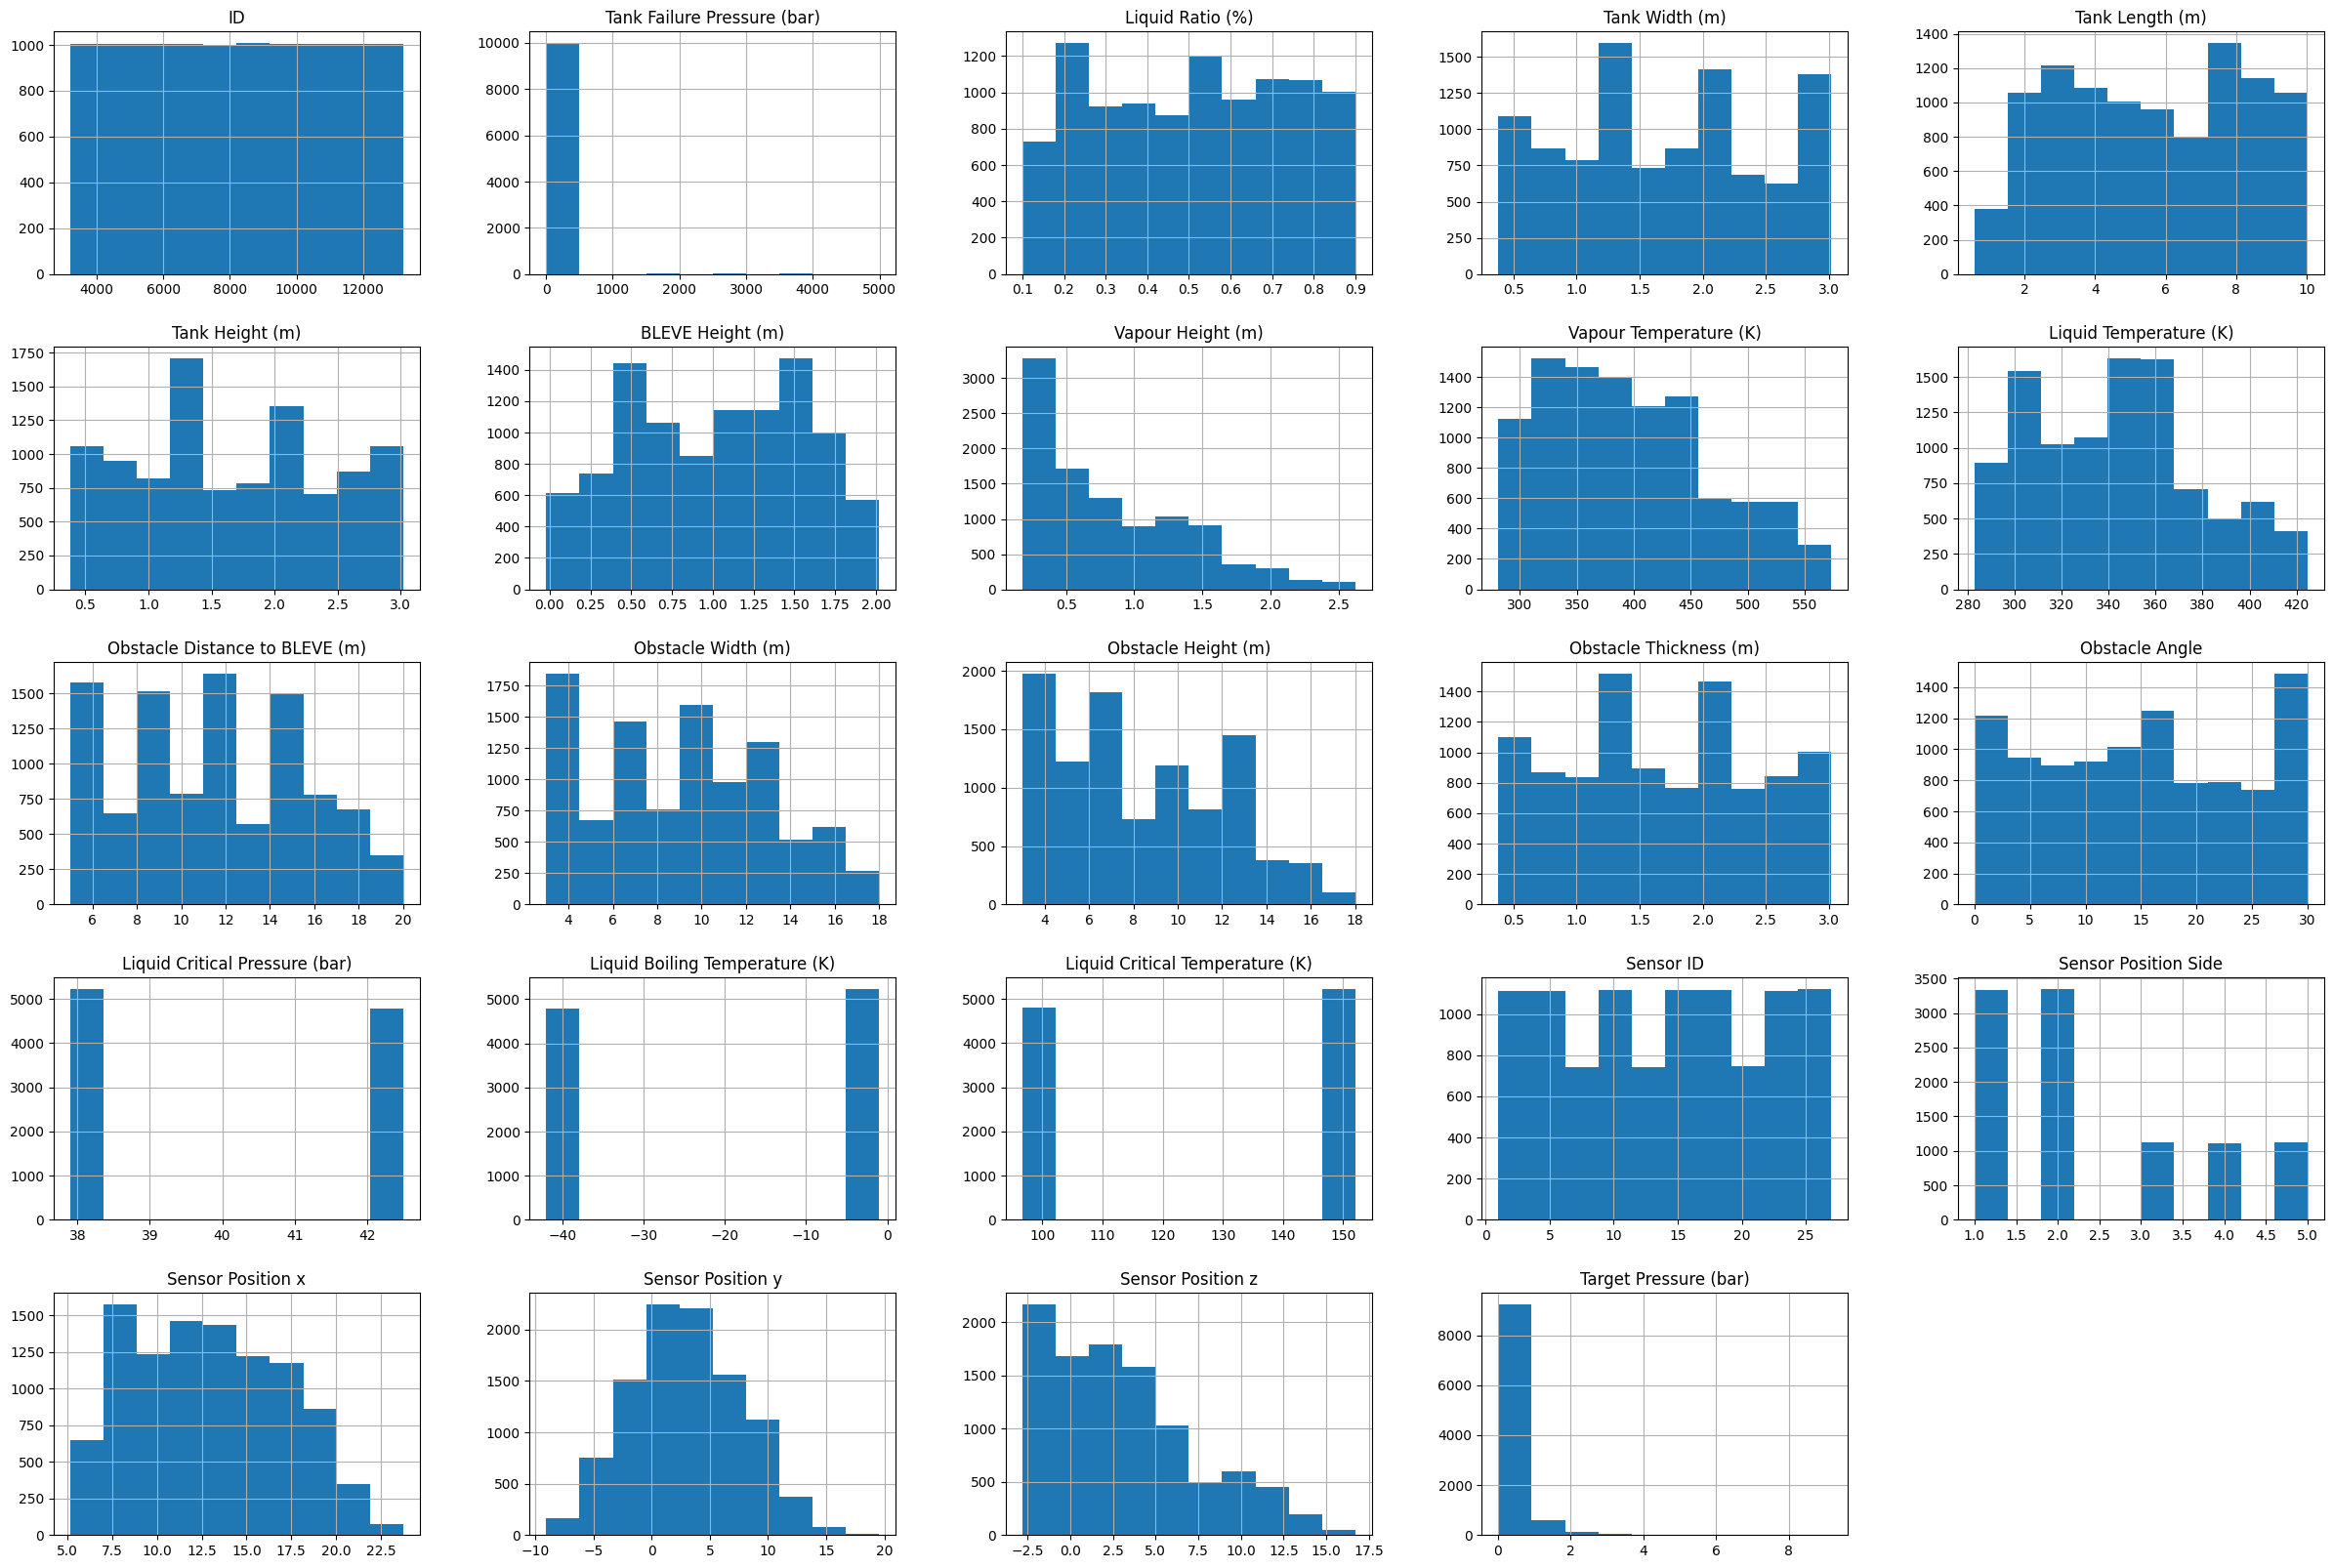

In [276]:
train_data.hist(figsize=(30, 20));

## Data Preprocessing

### Identifying and Handling Missing Values

In [277]:
train_data.isna().sum()

ID                                  5
Tank Failure Pressure (bar)         7
Liquid Ratio (%)                    9
Tank Width (m)                      9
Tank Length (m)                     9
Tank Height (m)                     8
BLEVE Height (m)                   10
Vapour Height (m)                   9
Vapour Temperature (K)             28
Liquid Temperature (K)             27
Obstacle Distance to BLEVE (m)      8
Obstacle Width (m)                  6
Obstacle Height (m)                 6
Obstacle Thickness (m)              7
Obstacle Angle                      8
Status                              7
Liquid Critical Pressure (bar)     30
Liquid Boiling Temperature (K)     29
Liquid Critical Temperature (K)    30
Sensor ID                           8
Sensor Position Side                8
Sensor Position x                   7
Sensor Position y                   8
Sensor Position z                   9
Target Pressure (bar)              10
dtype: int64

In [278]:
train_data.dropna(inplace=True)

In [279]:
train_data.isna().sum()

ID                                 0
Tank Failure Pressure (bar)        0
Liquid Ratio (%)                   0
Tank Width (m)                     0
Tank Length (m)                    0
Tank Height (m)                    0
BLEVE Height (m)                   0
Vapour Height (m)                  0
Vapour Temperature (K)             0
Liquid Temperature (K)             0
Obstacle Distance to BLEVE (m)     0
Obstacle Width (m)                 0
Obstacle Height (m)                0
Obstacle Thickness (m)             0
Obstacle Angle                     0
Status                             0
Liquid Critical Pressure (bar)     0
Liquid Boiling Temperature (K)     0
Liquid Critical Temperature (K)    0
Sensor ID                          0
Sensor Position Side               0
Sensor Position x                  0
Sensor Position y                  0
Sensor Position z                  0
Target Pressure (bar)              0
dtype: int64

### Outlier Detection and Treatment

<Axes: >

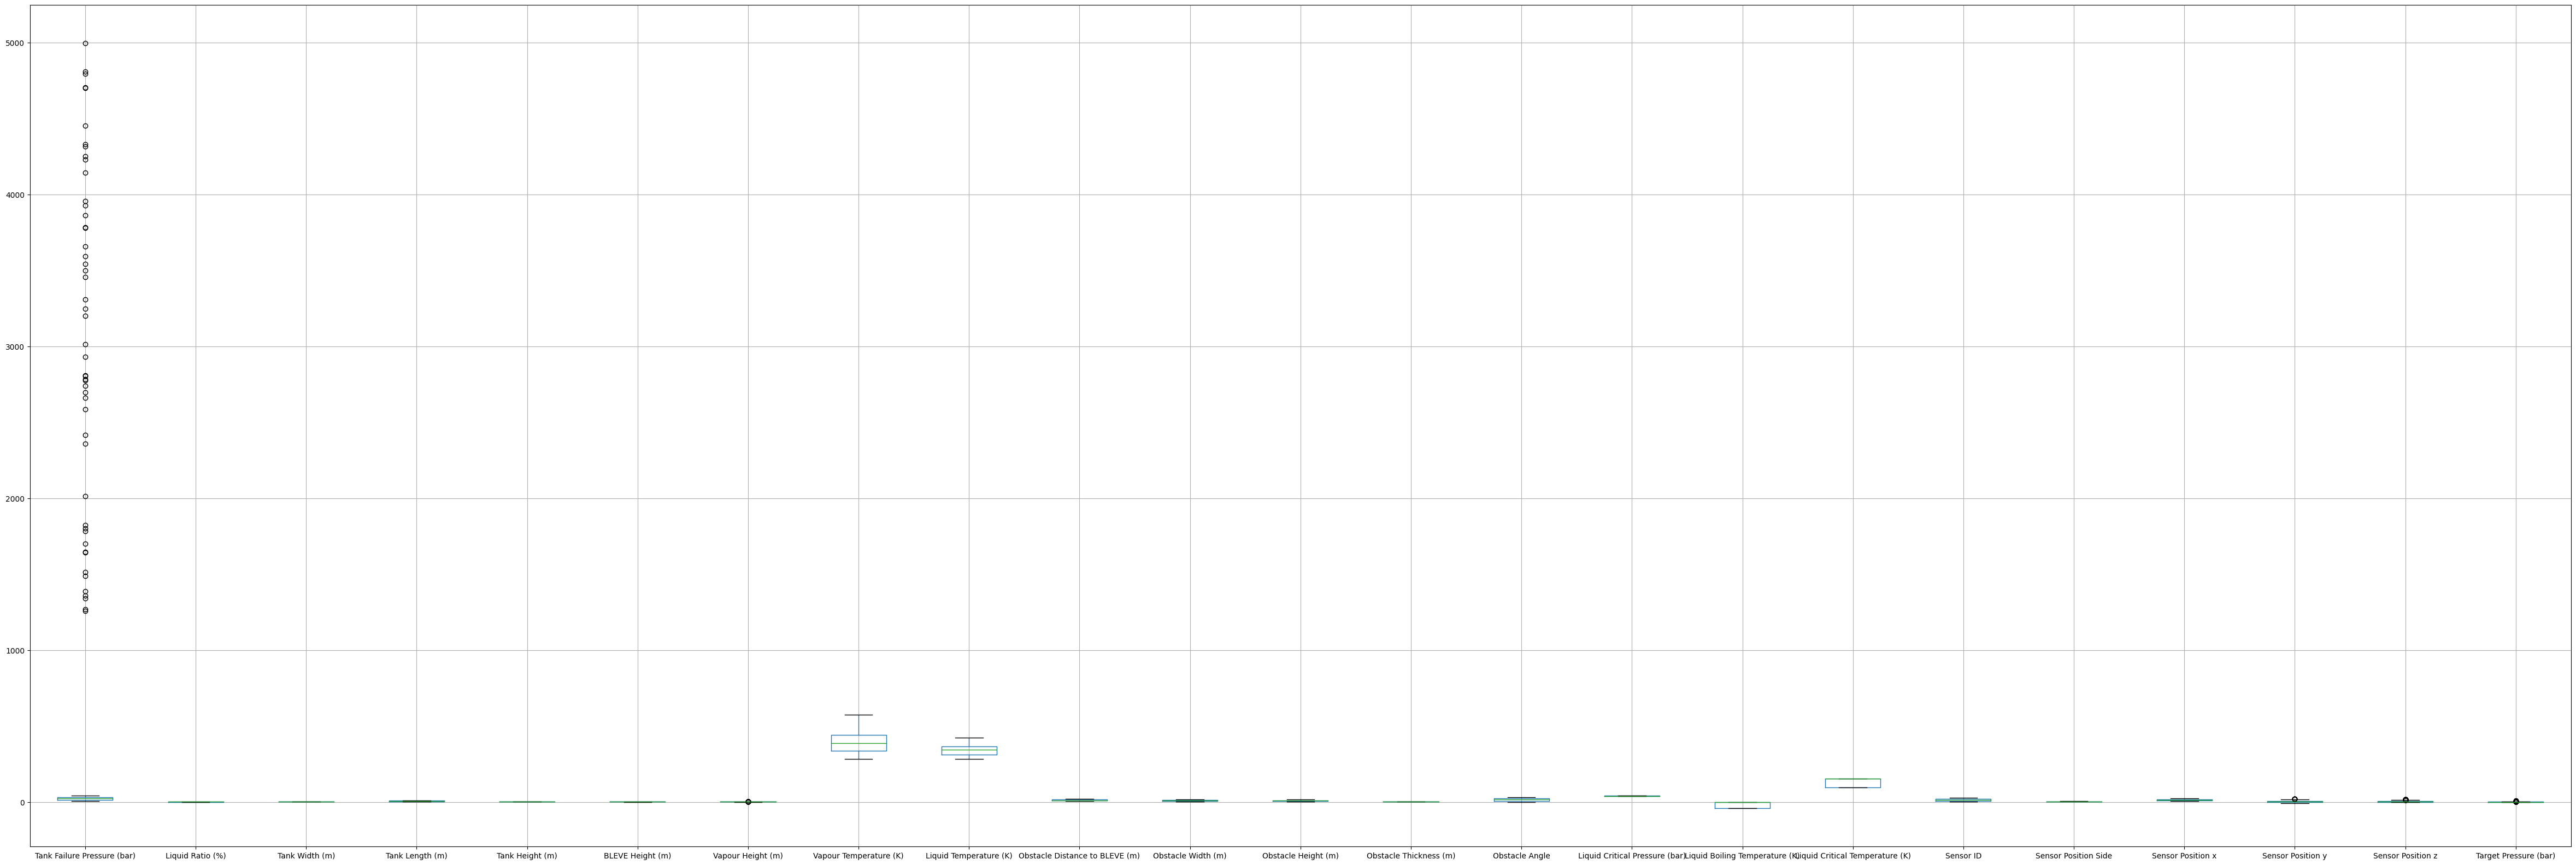

In [280]:
train_data.drop(['ID'], axis=1).boxplot(grid=True, figsize=(60, 20))

##### Z-SCORE Treatment

In [281]:
def find_outliers(df, column):

  upper_limit = df[column].mean() + 3*df[column].std()
  lower_limit = df[column].mean() - 3*df[column].std()
  outliers = df.loc[(df[column] > upper_limit) | (df[column] < lower_limit)]

  print("column: ", column)
  print('upper limit: ', upper_limit)
  print('lower limit: ', lower_limit)
  print('outlier count: ', len(outliers))
  print()

  return upper_limit, lower_limit

In [282]:
for column in train_data.drop(['ID', 'Status'], axis=1).columns:
  find_outliers(train_data, column);

column:  Tank Failure Pressure (bar)
upper limit:  718.5009485898352
lower limit:  -642.3946099936331
outlier count:  50

column:  Liquid Ratio (%)
upper limit:  1.188909956284705
lower limit:  -0.1803247278685246
outlier count:  0

column:  Tank Width (m)
upper limit:  3.992503294987627
lower limit:  -0.5979269214718292
outlier count:  0

column:  Tank Length (m)
upper limit:  13.387238014964085
lower limit:  -2.192150472198941
outlier count:  0

column:  Tank Height (m)
upper limit:  3.9287756227660786
lower limit:  -0.5791117064851365
outlier count:  0

column:  BLEVE Height (m)
upper limit:  2.7494150161760498
lower limit:  -0.7024377571702132
outlier count:  0

column:  Vapour Height (m)
upper limit:  2.4556217624469903
lower limit:  -0.7633275382570123
outlier count:  53

column:  Vapour Temperature (K)
upper limit:  612.1756134666362
lower limit:  181.2116133395623
outlier count:  0

column:  Liquid Temperature (K)
upper limit:  450.0895384331997
lower limit:  236.7759978920165


In [283]:
def remove_outliers(df, column):

  plt.figure(figsize=(10,10))
  fig, axes = plt.subplots(nrows=2, ncols=1)
  fig.suptitle(column)
  axes[0].set_title('Before removing outliers')
  axes[1].set_title('After removing outliers')
  fig.tight_layout()

  df.boxplot(column = column, ax=axes[0], vert=False)

  upper_limit, lower_limit = find_outliers(df, column)
  df = df.loc[(df[column] < upper_limit) & (df[column] > lower_limit)]

  df.boxplot(column = column, ax=axes[1], vert=False)

  return df


column:  Tank Failure Pressure (bar)
upper limit:  718.5009485898352
lower limit:  -642.3946099936331
outlier count:  50



<Figure size 1000x1000 with 0 Axes>

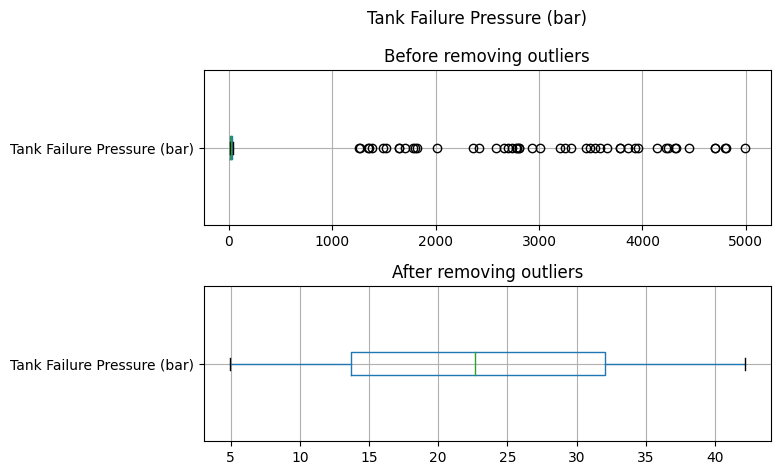

In [284]:
train_data = remove_outliers(train_data, 'Tank Failure Pressure (bar)')

column:  Vapour Height (m)
upper limit:  2.4563816127562
lower limit:  -0.764187033468174
outlier count:  53



<Figure size 1000x1000 with 0 Axes>

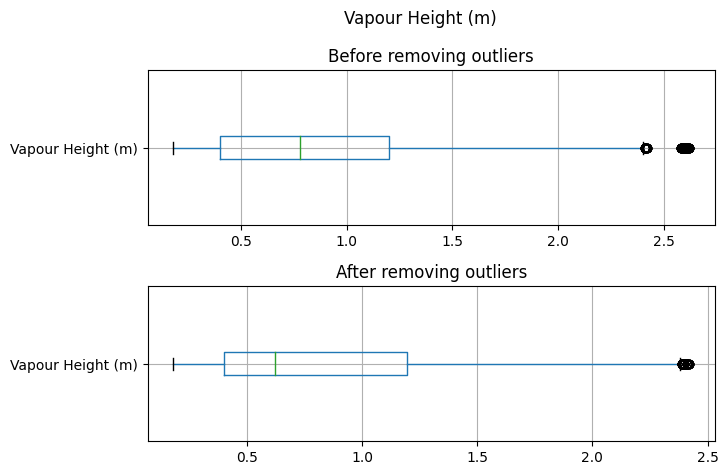

In [285]:
train_data = remove_outliers(train_data, 'Vapour Height (m)')

column:  Sensor Position y
upper limit:  17.124485923541698
lower limit:  -11.159341032845205
outlier count:  10



<Figure size 1000x1000 with 0 Axes>

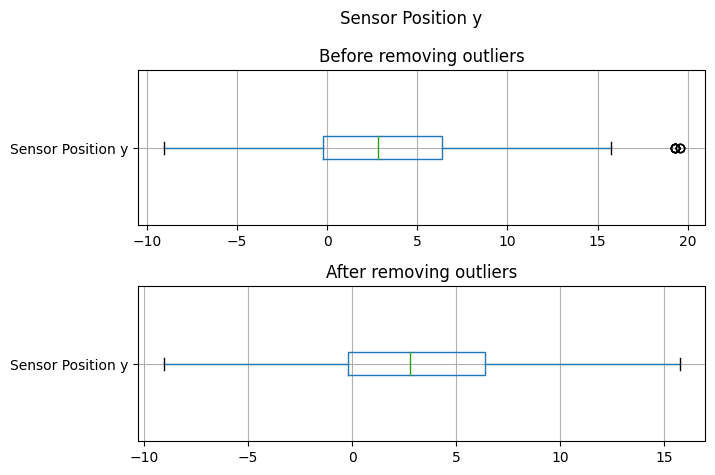

In [286]:
train_data = remove_outliers(train_data, 'Sensor Position y')

column:  Sensor Position z
upper limit:  15.740721619021542
lower limit:  -9.555337395102967
outlier count:  17



<Figure size 1000x1000 with 0 Axes>

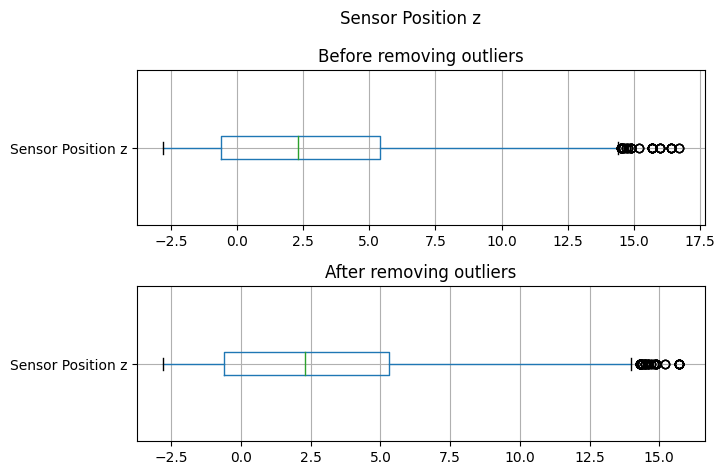

In [287]:
train_data = remove_outliers(train_data, 'Sensor Position z')

column:  Target Pressure (bar)
upper limit:  1.8100866941292908
lower limit:  -1.0964084075632223
outlier count:  189



<Figure size 1000x1000 with 0 Axes>

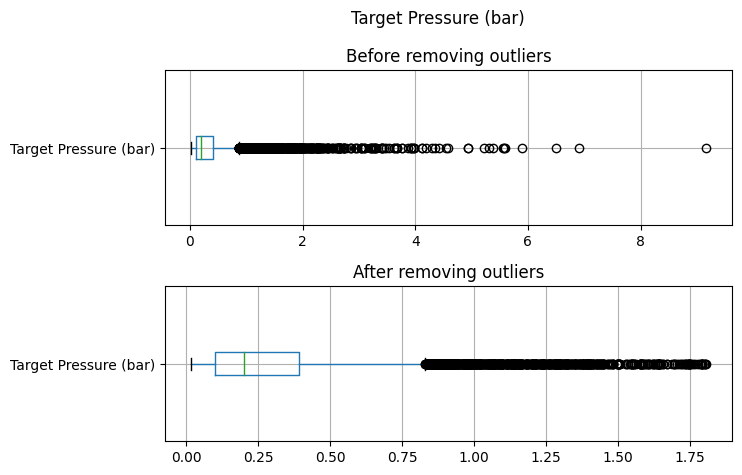

In [288]:
train_data = remove_outliers(train_data, 'Target Pressure (bar)')

<Axes: >

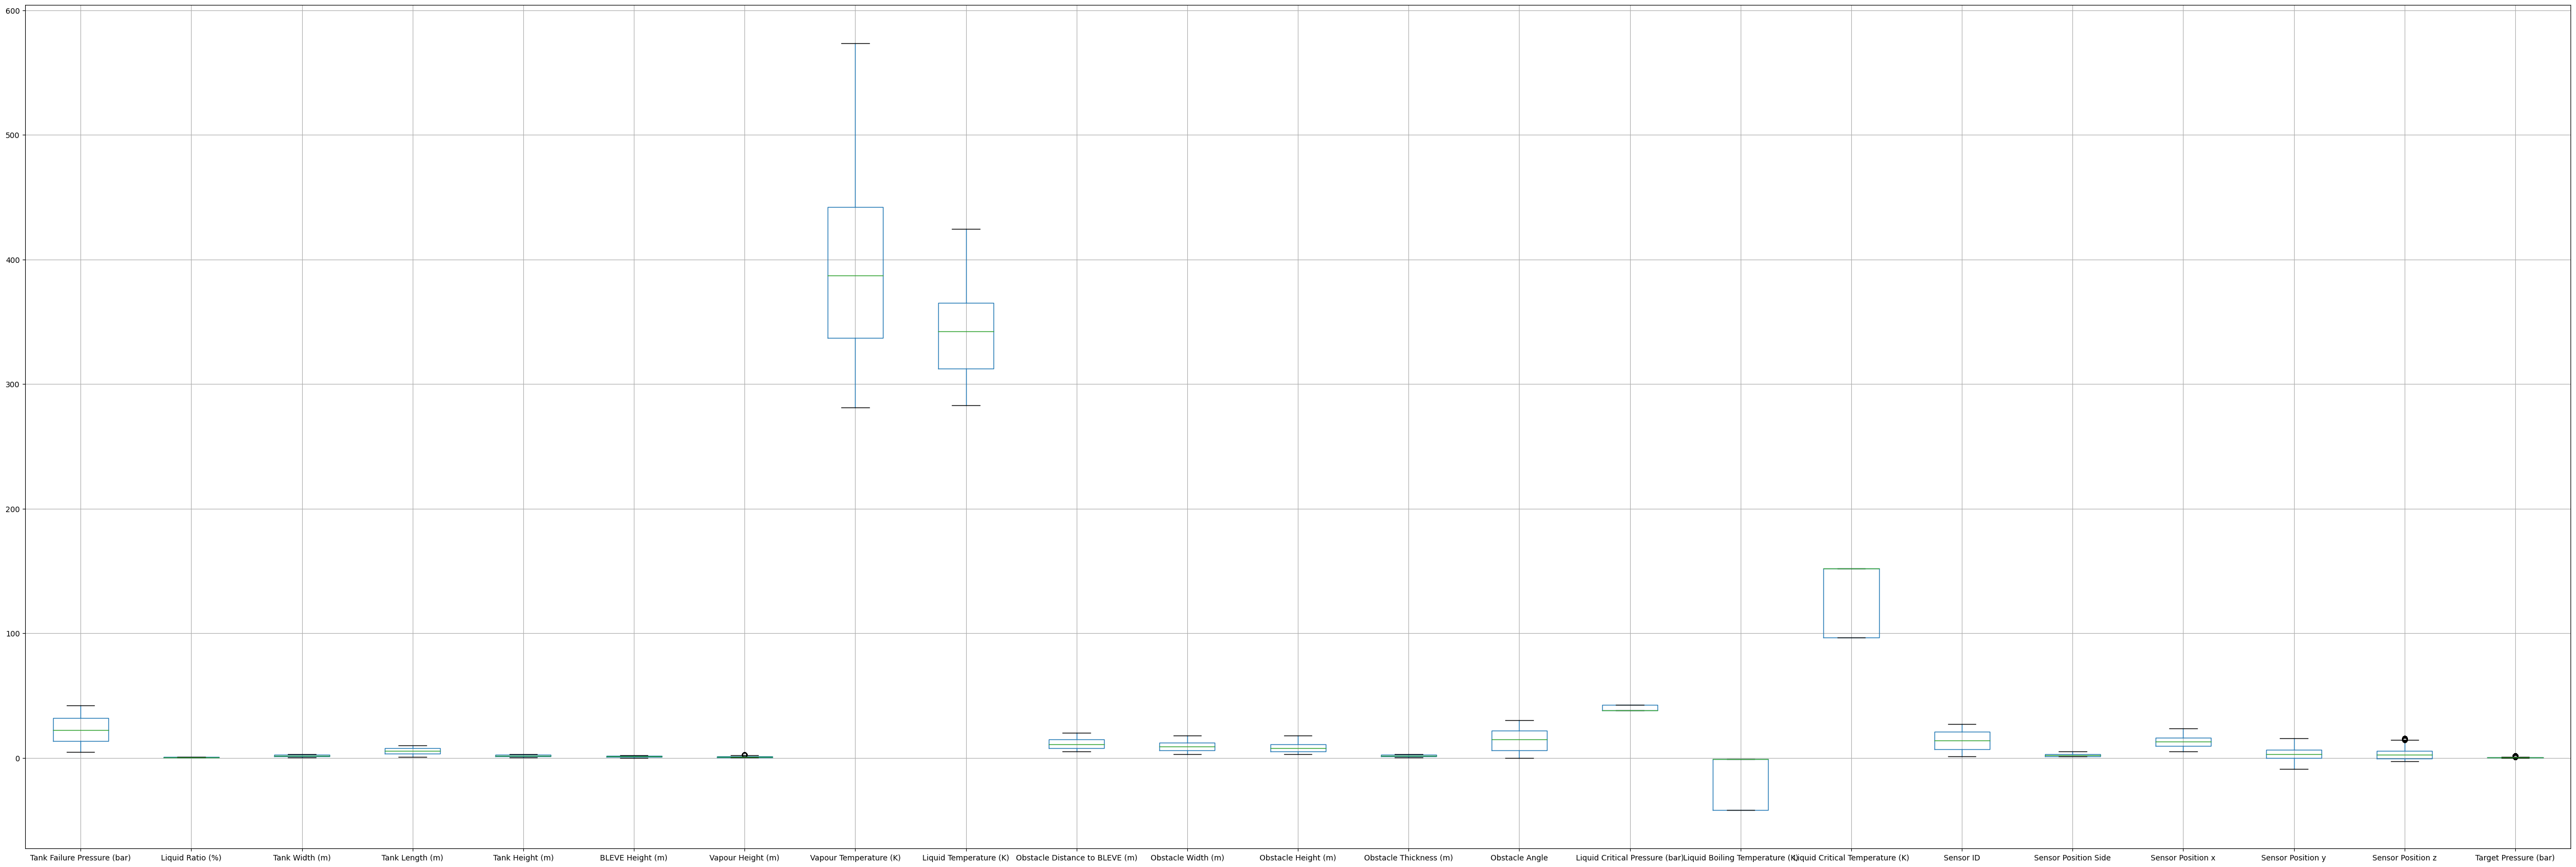

In [289]:
train_data.drop(['ID'], axis=1).boxplot(grid=True, figsize=(60, 20))

### Checking for Duplicates

In [290]:
train_data.duplicated().sum()

47

In [291]:
train_data.drop_duplicates()

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
0,3203.0,7.32,0.42,2.42,5.39,1.00,1.79,0.60,524.61,354.49,...,Superheated,37.9,-1.0,152.0,18.0,2.0,12.15,7.90,10.7,0.199929
1,3204.0,7.18,0.42,2.39,5.39,1.01,1.81,0.59,522.80,354.31,...,Superheated,37.9,-1.0,152.0,19.0,3.0,12.50,-2.95,-1.9,0.435681
2,3205.0,7.32,0.41,2.39,5.38,1.00,1.78,0.62,523.00,354.59,...,Superheated,37.9,-1.0,152.0,20.0,3.0,12.50,-2.95,4.4,0.264031
3,3206.0,7.26,0.42,2.40,5.41,1.00,1.81,0.61,522.35,354.37,...,Superheated,37.9,-1.0,152.0,21.0,3.0,12.50,-2.95,10.7,0.270576
4,3207.0,7.32,0.42,2.40,5.41,1.02,1.79,0.62,522.98,354.33,...,Superheated,37.9,-1.0,152.0,22.0,4.0,12.50,-2.70,11.0,0.204675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,13198.0,18.09,0.57,2.00,7.19,0.98,0.18,0.39,540.00,319.57,...,Subcooled,37.9,-1.0,152.0,23.0,4.0,16.10,0.80,14.7,0.100168
9996,13199.0,18.18,0.57,1.98,7.19,0.98,0.22,0.41,539.59,318.92,...,Subcooled,37.9,-1.0,152.0,24.0,4.0,16.10,6.60,14.7,0.116293
9997,13200.0,18.21,0.57,1.98,7.19,1.00,0.19,0.39,540.22,319.25,...,Subcooled,37.9,-1.0,152.0,25.0,5.0,16.10,6.85,-0.2,0.112795
9998,13201.0,18.41,0.57,1.99,7.19,1.01,0.21,0.41,539.23,318.86,...,Subcooled,37.9,-1.0,152.0,26.0,5.0,16.10,6.85,7.1,0.126599


### Rectifying Incorrect Entries

In [292]:
train_data.Status.value_counts()

Status
Subcooled      6035
Superheated    3513
Subcool          22
subcooled        20
Subcoled         14
superheated       6
Superheat         6
Saperheated       3
Name: count, dtype: int64

In [293]:
def rectify_status_values(data):
  data.Status = data.Status.str.capitalize()

  mask = data['Status'] == 'Saperheated'
  data.loc[mask, 'Status'] = 'Superheated'

  mask = data['Status'] == 'Subcool'
  data.loc[mask, 'Status'] = 'Subcooled'

  mask = data['Status'] == 'Subcoled'
  data.loc[mask, 'Status'] = 'Subcooled'

  mask = data['Status'] == 'Superheat'
  data.loc[mask, 'Status'] = 'Superheated'

  return data

In [294]:
train_data = rectify_status_values(train_data)

In [295]:
train_data.Status.value_counts()

Status
Subcooled      6091
Superheated    3528
Name: count, dtype: int64

### Feature Engineering

<Axes: >

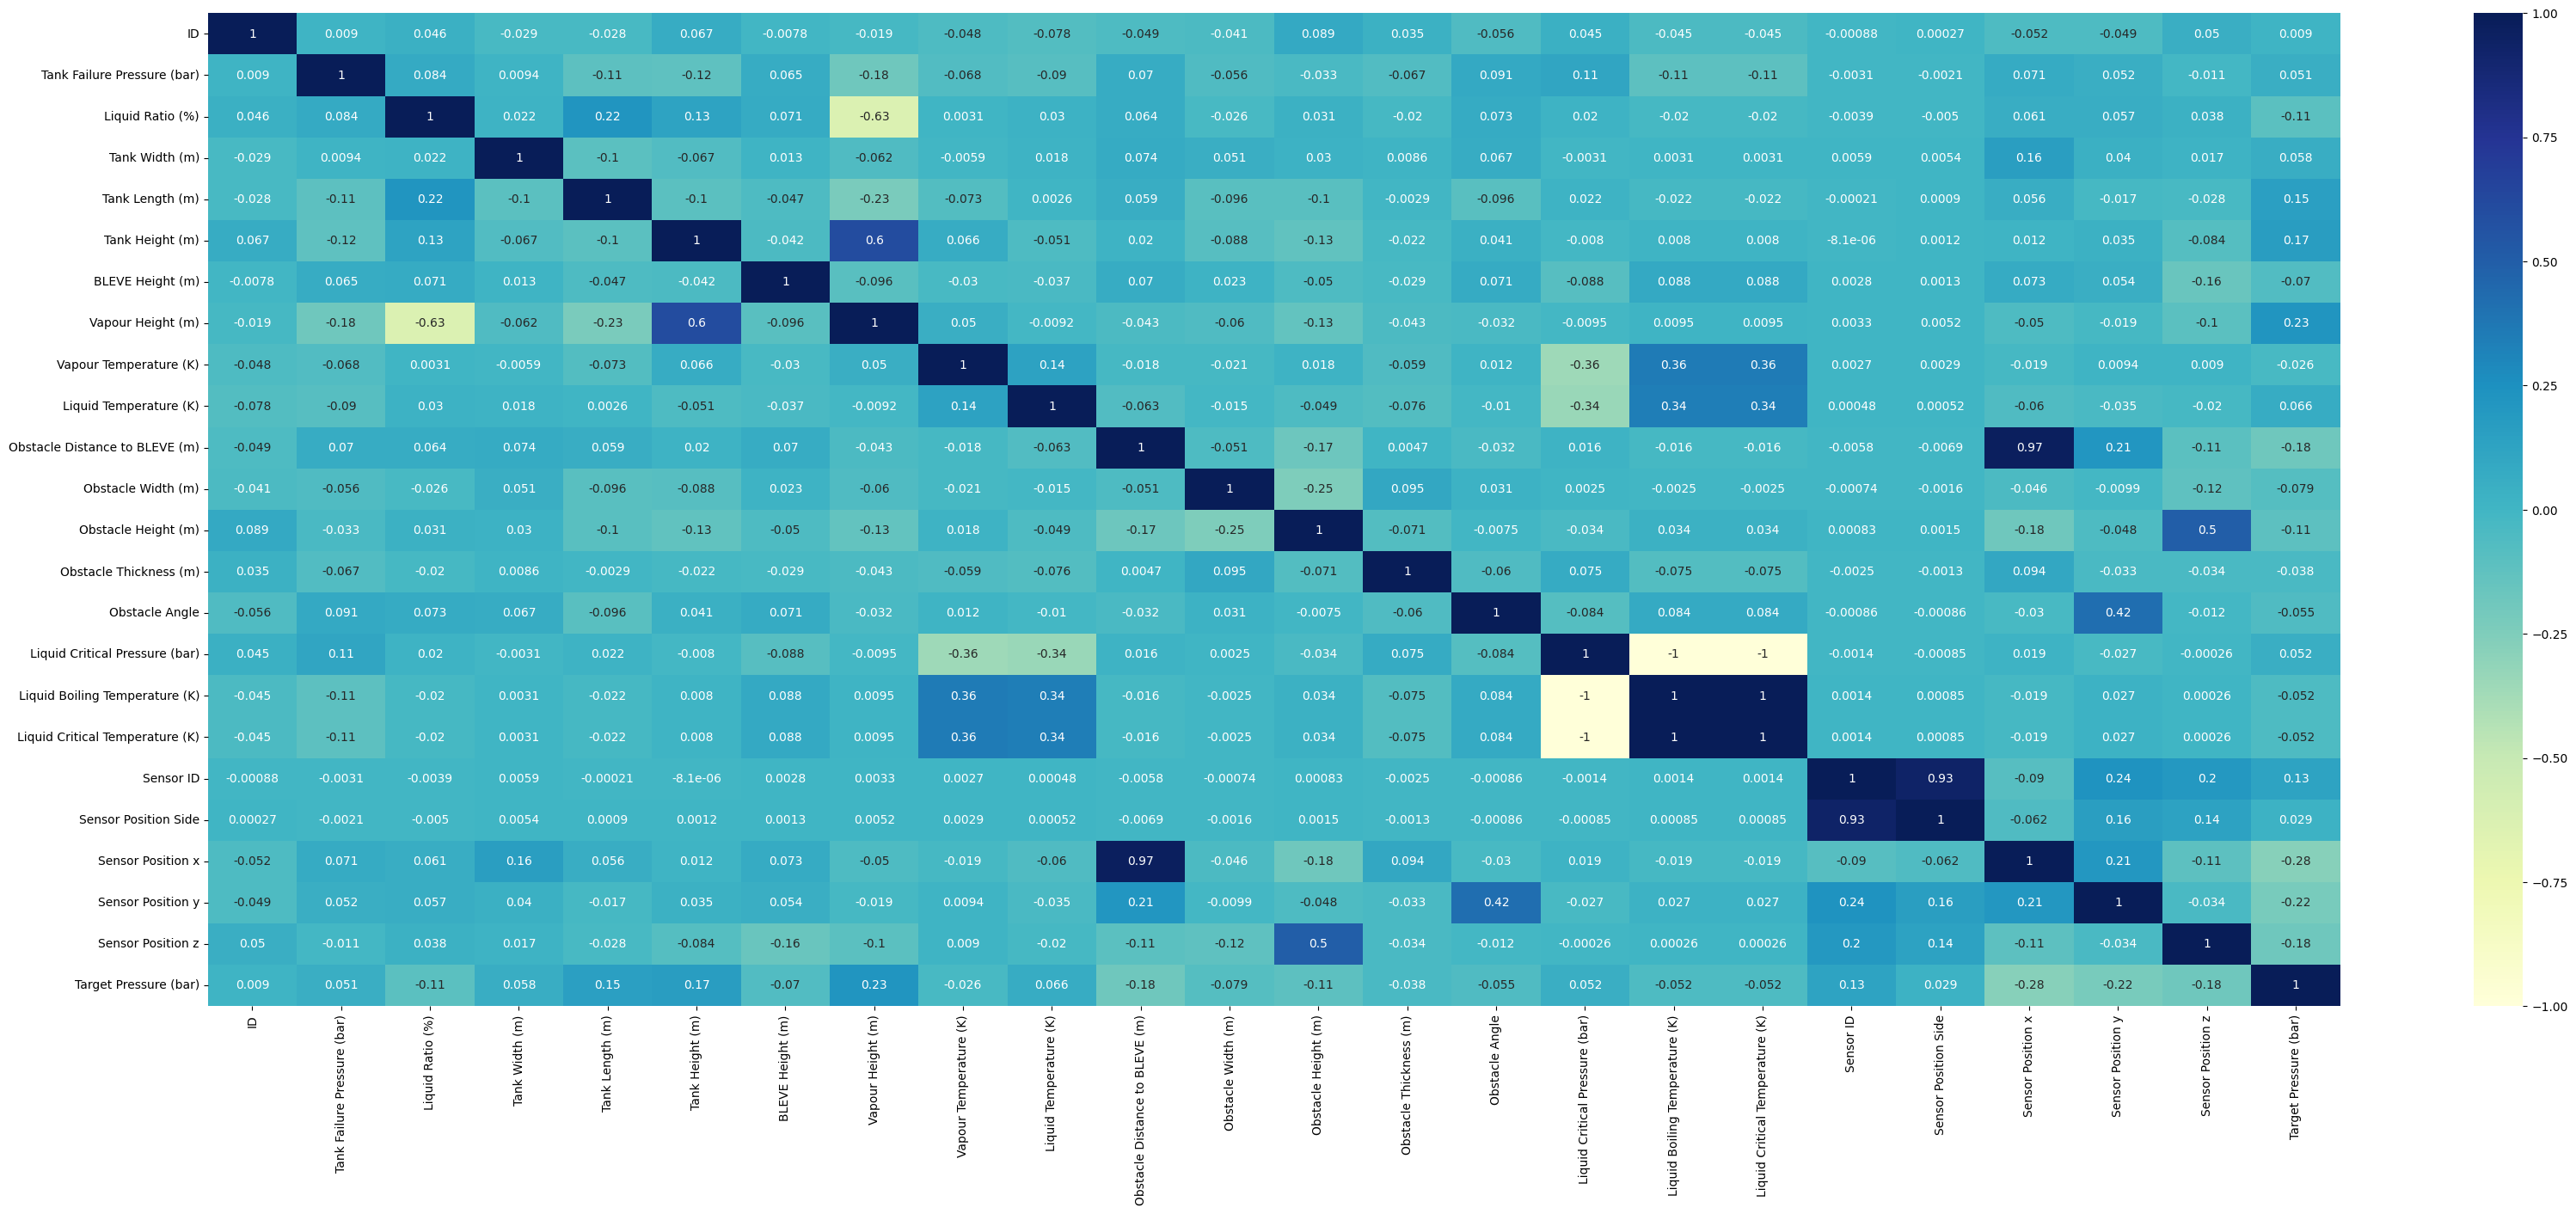

In [296]:
plt.figure(figsize=(40, 15))
sns.heatmap(train_data.drop(['Status'], axis =1).corr(), annot=True, cmap="YlGnBu")

In [297]:
train_data['Tank Volume (m^3)'] = train_data['Tank Width (m)'] * train_data['Tank Length (m)'] * train_data['Tank Height (m)']
train_data['Obstacle Area (m^2)'] = 2*(train_data['Obstacle Width (m)'] * train_data['Obstacle Height (m)'] + train_data['Obstacle Height (m)'] * train_data['Obstacle Thickness (m)'] + train_data['Obstacle Width (m)'] * train_data['Obstacle Thickness (m)'])
train_data['Vapour Volume'] = (1 - train_data['Liquid Ratio (%)']) * train_data['Tank Volume (m^3)']
train_data['Vapour Force']  = train_data['Tank Failure Pressure (bar)'] * (train_data['Tank Length (m)'] * train_data['Vapour Height (m)'])
train_data['Temperature Difference'] = train_data['Liquid Temperature (K)'] - train_data['Vapour Temperature (K)']
train_data['Effective Obstacle Width']  = train_data['Obstacle Width (m)'] * np.cos(train_data['Obstacle Angle'])
train_data['Tank Surface Area']  = 2 * (train_data['Tank Length (m)'] * train_data['Tank Width (m)'] + train_data['Tank Length (m)'] * train_data['Tank Height (m)'] + train_data['Tank Width (m)'] * train_data['Tank Height (m)'])

train_data['Sensor Distance to Tank x'] = (train_data['Sensor Position x'] - train_data['Tank Length (m)']/2) ** 2
train_data['Sensor Distance to Tank y'] = (train_data['Sensor Position y'] - train_data['Tank Width (m)']/2) ** 2
train_data['Sensor Distance to Tank z'] = (train_data['Sensor Position z'] - train_data['Tank Height (m)']/2) ** 2
train_data['Sensor Distance to Tank'] = np.sqrt(train_data['Sensor Distance to Tank x'] + train_data['Sensor Distance to Tank y'] + train_data['Sensor Distance to Tank z'])

train_data['Liquid Volume'] = train_data['Tank Volume (m^3)'] - train_data['Vapour Volume']
train_data['Liquid to Vapour Ratio'] = train_data['Liquid Volume'] / train_data['Vapour Volume']
train_data['Distance Ratio'] = train_data['Obstacle Distance to BLEVE (m)'] / train_data['Tank Height (m)']

train_data['Relative Position of Obstacle (normalized)'] = train_data['Obstacle Distance to BLEVE (m)'] / ( train_data['Tank Width (m)'] + train_data['Tank Length (m)'] + train_data['Tank Height (m)'])
train_data['Obstacle Aspect Ratio'] = train_data['Obstacle Height (m)'] / train_data['Obstacle Width (m)']
train_data['Obstacle Size (m^3)'] = train_data['Obstacle Width (m)'] * train_data['Obstacle Height (m)'] * train_data['Obstacle Thickness (m)']
train_data['Volume to Obstacle Area Ratio'] = train_data['Obstacle Size (m^3)'] / train_data['Obstacle Area (m^2)']


<Axes: >

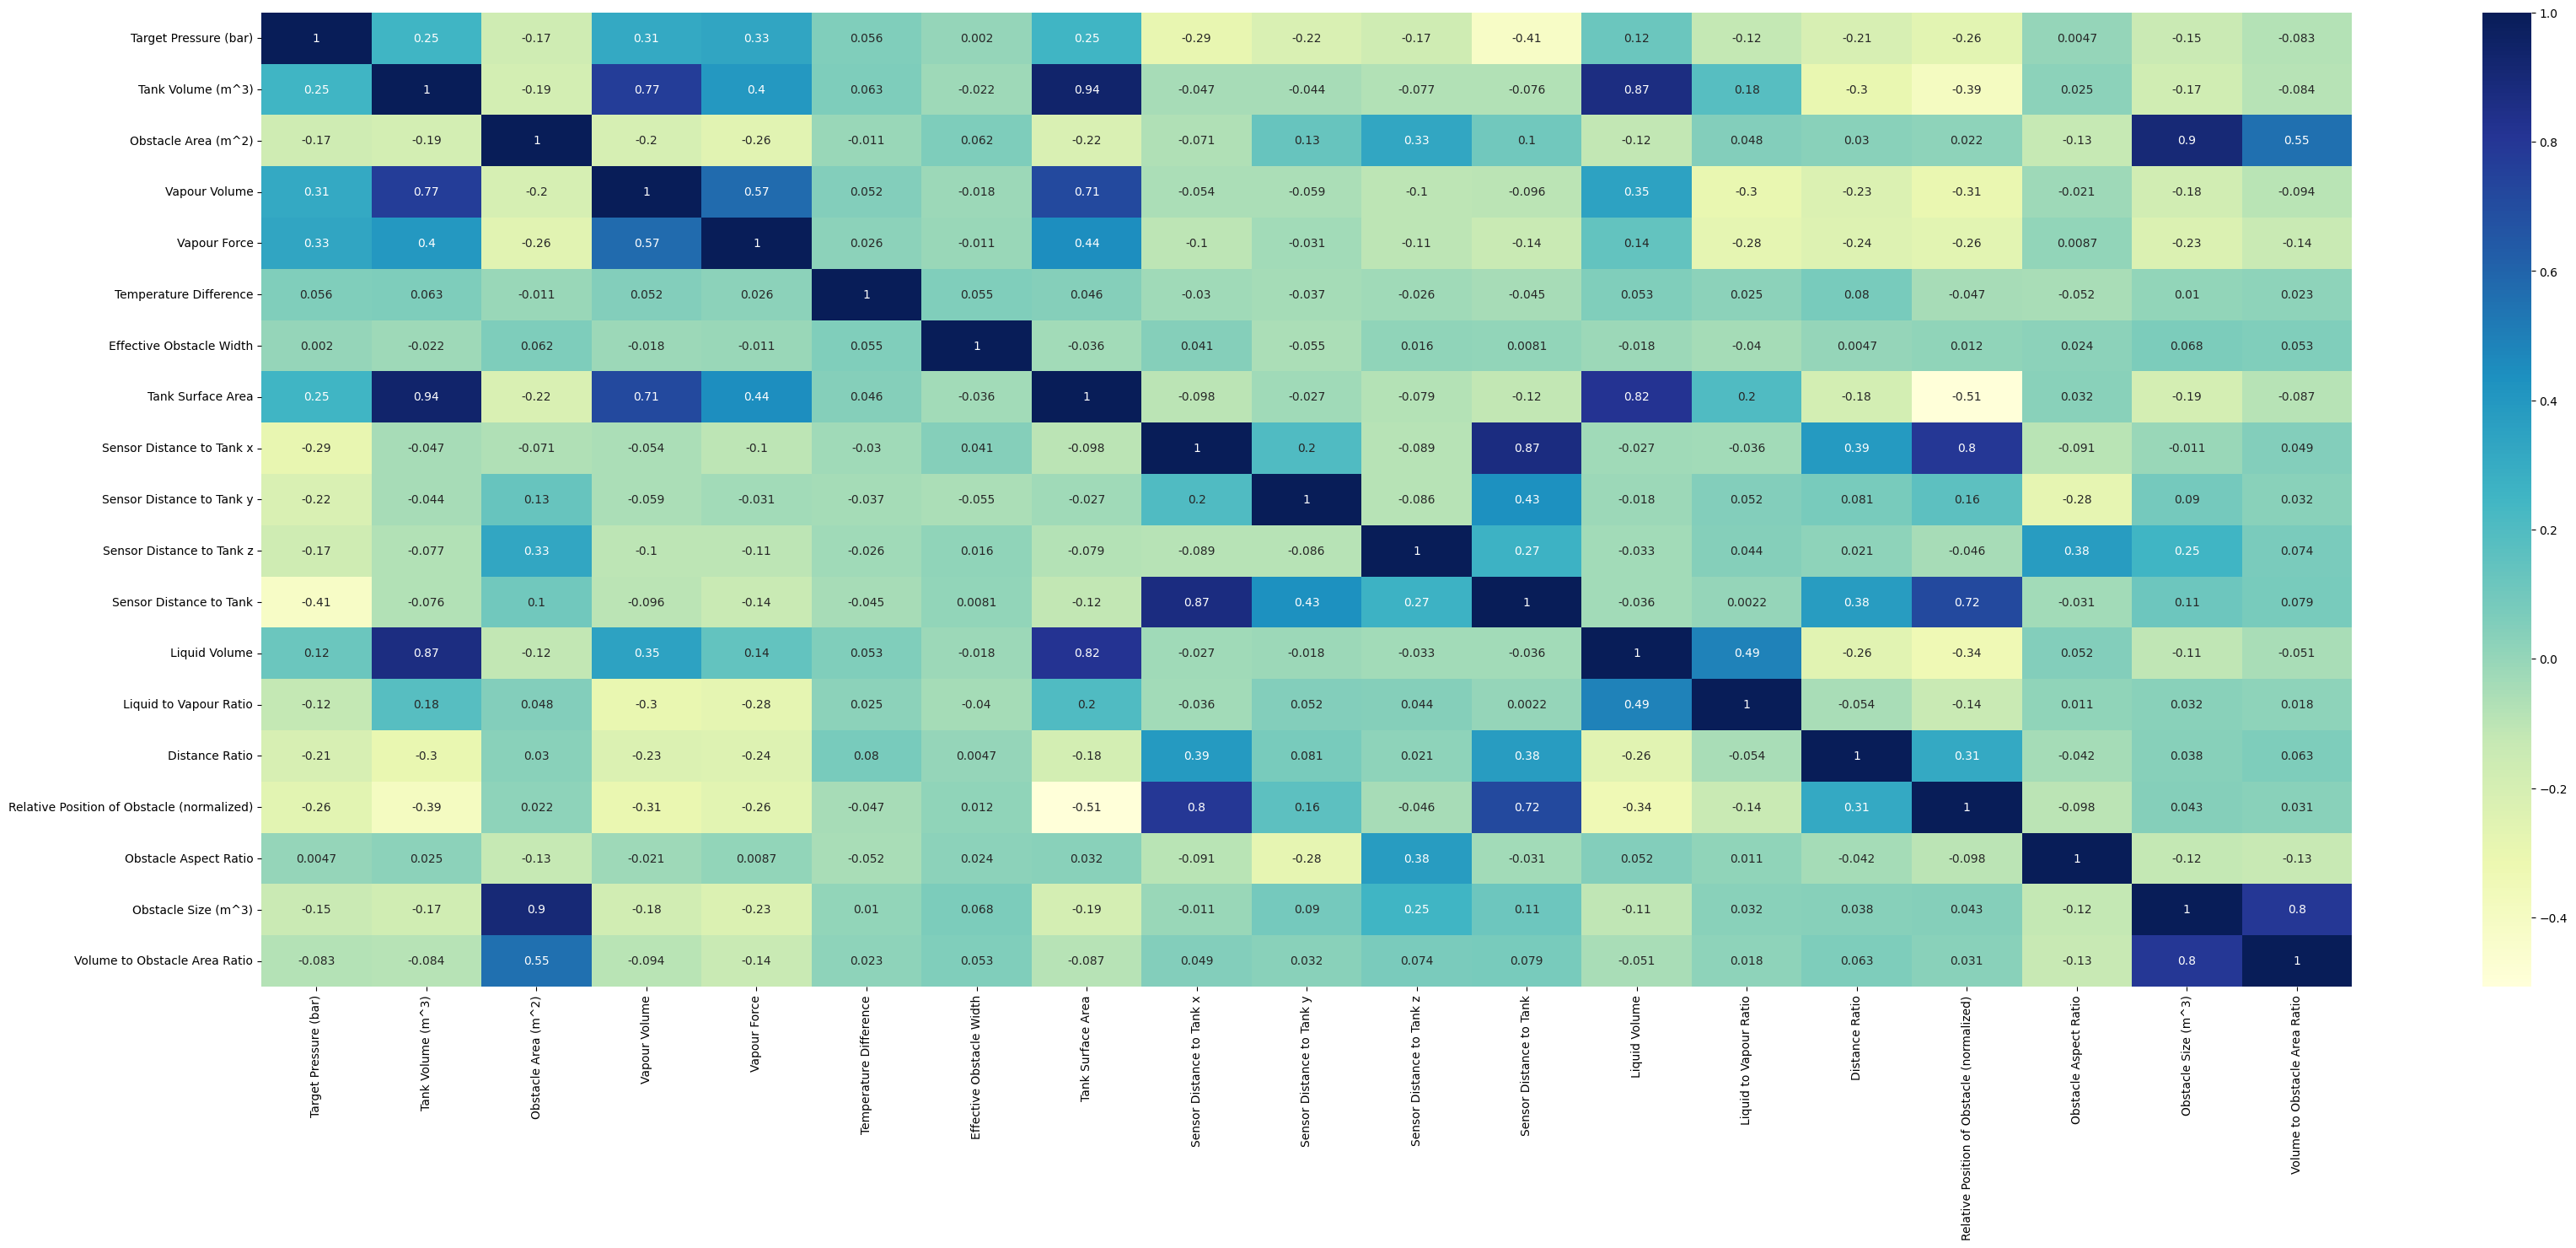

In [298]:
plt.figure(figsize=(40, 15))
sns.heatmap(train_data.drop(['Status'], axis =1).iloc[:, 23:].corr(), annot=True, cmap="YlGnBu")

In [299]:
# train_data['Tank Volume (m^3)'] = np.log(train_data['Tank Volume (m^3)'] + 1)
# train_data['Obstacle Area (m^2)'] = np.log(train_data['Obstacle Area (m^2)'] + 1)
# train_data['Vapour Volume'] = np.log(train_data['Vapour Volume'] + 1)
# train_data['Vapour Force'] = np.log(train_data['Vapour Force'] + 1)
# train_data['Liquid Volume'] = np.log(train_data['Liquid Volume'] + 1)
# train_data['Liquid to Vapour Ratio'] = np.log(train_data['Liquid to Vapour Ratio'] + 1)
# train_data['Relative Position of Obstacle (normalized)'] = np.log(train_data['Relative Position of Obstacle (normalized)'] + 1)
# train_data['Obstacle Aspect Ratio'] = np.log(train_data['Obstacle Aspect Ratio'] + 1)
# train_data['Obstacle Size (m^3)'] = np.log(train_data['Obstacle Size (m^3)'] + 1)
# train_data['Distance Ratio'] = np.log(train_data['Distance Ratio'] + 1)

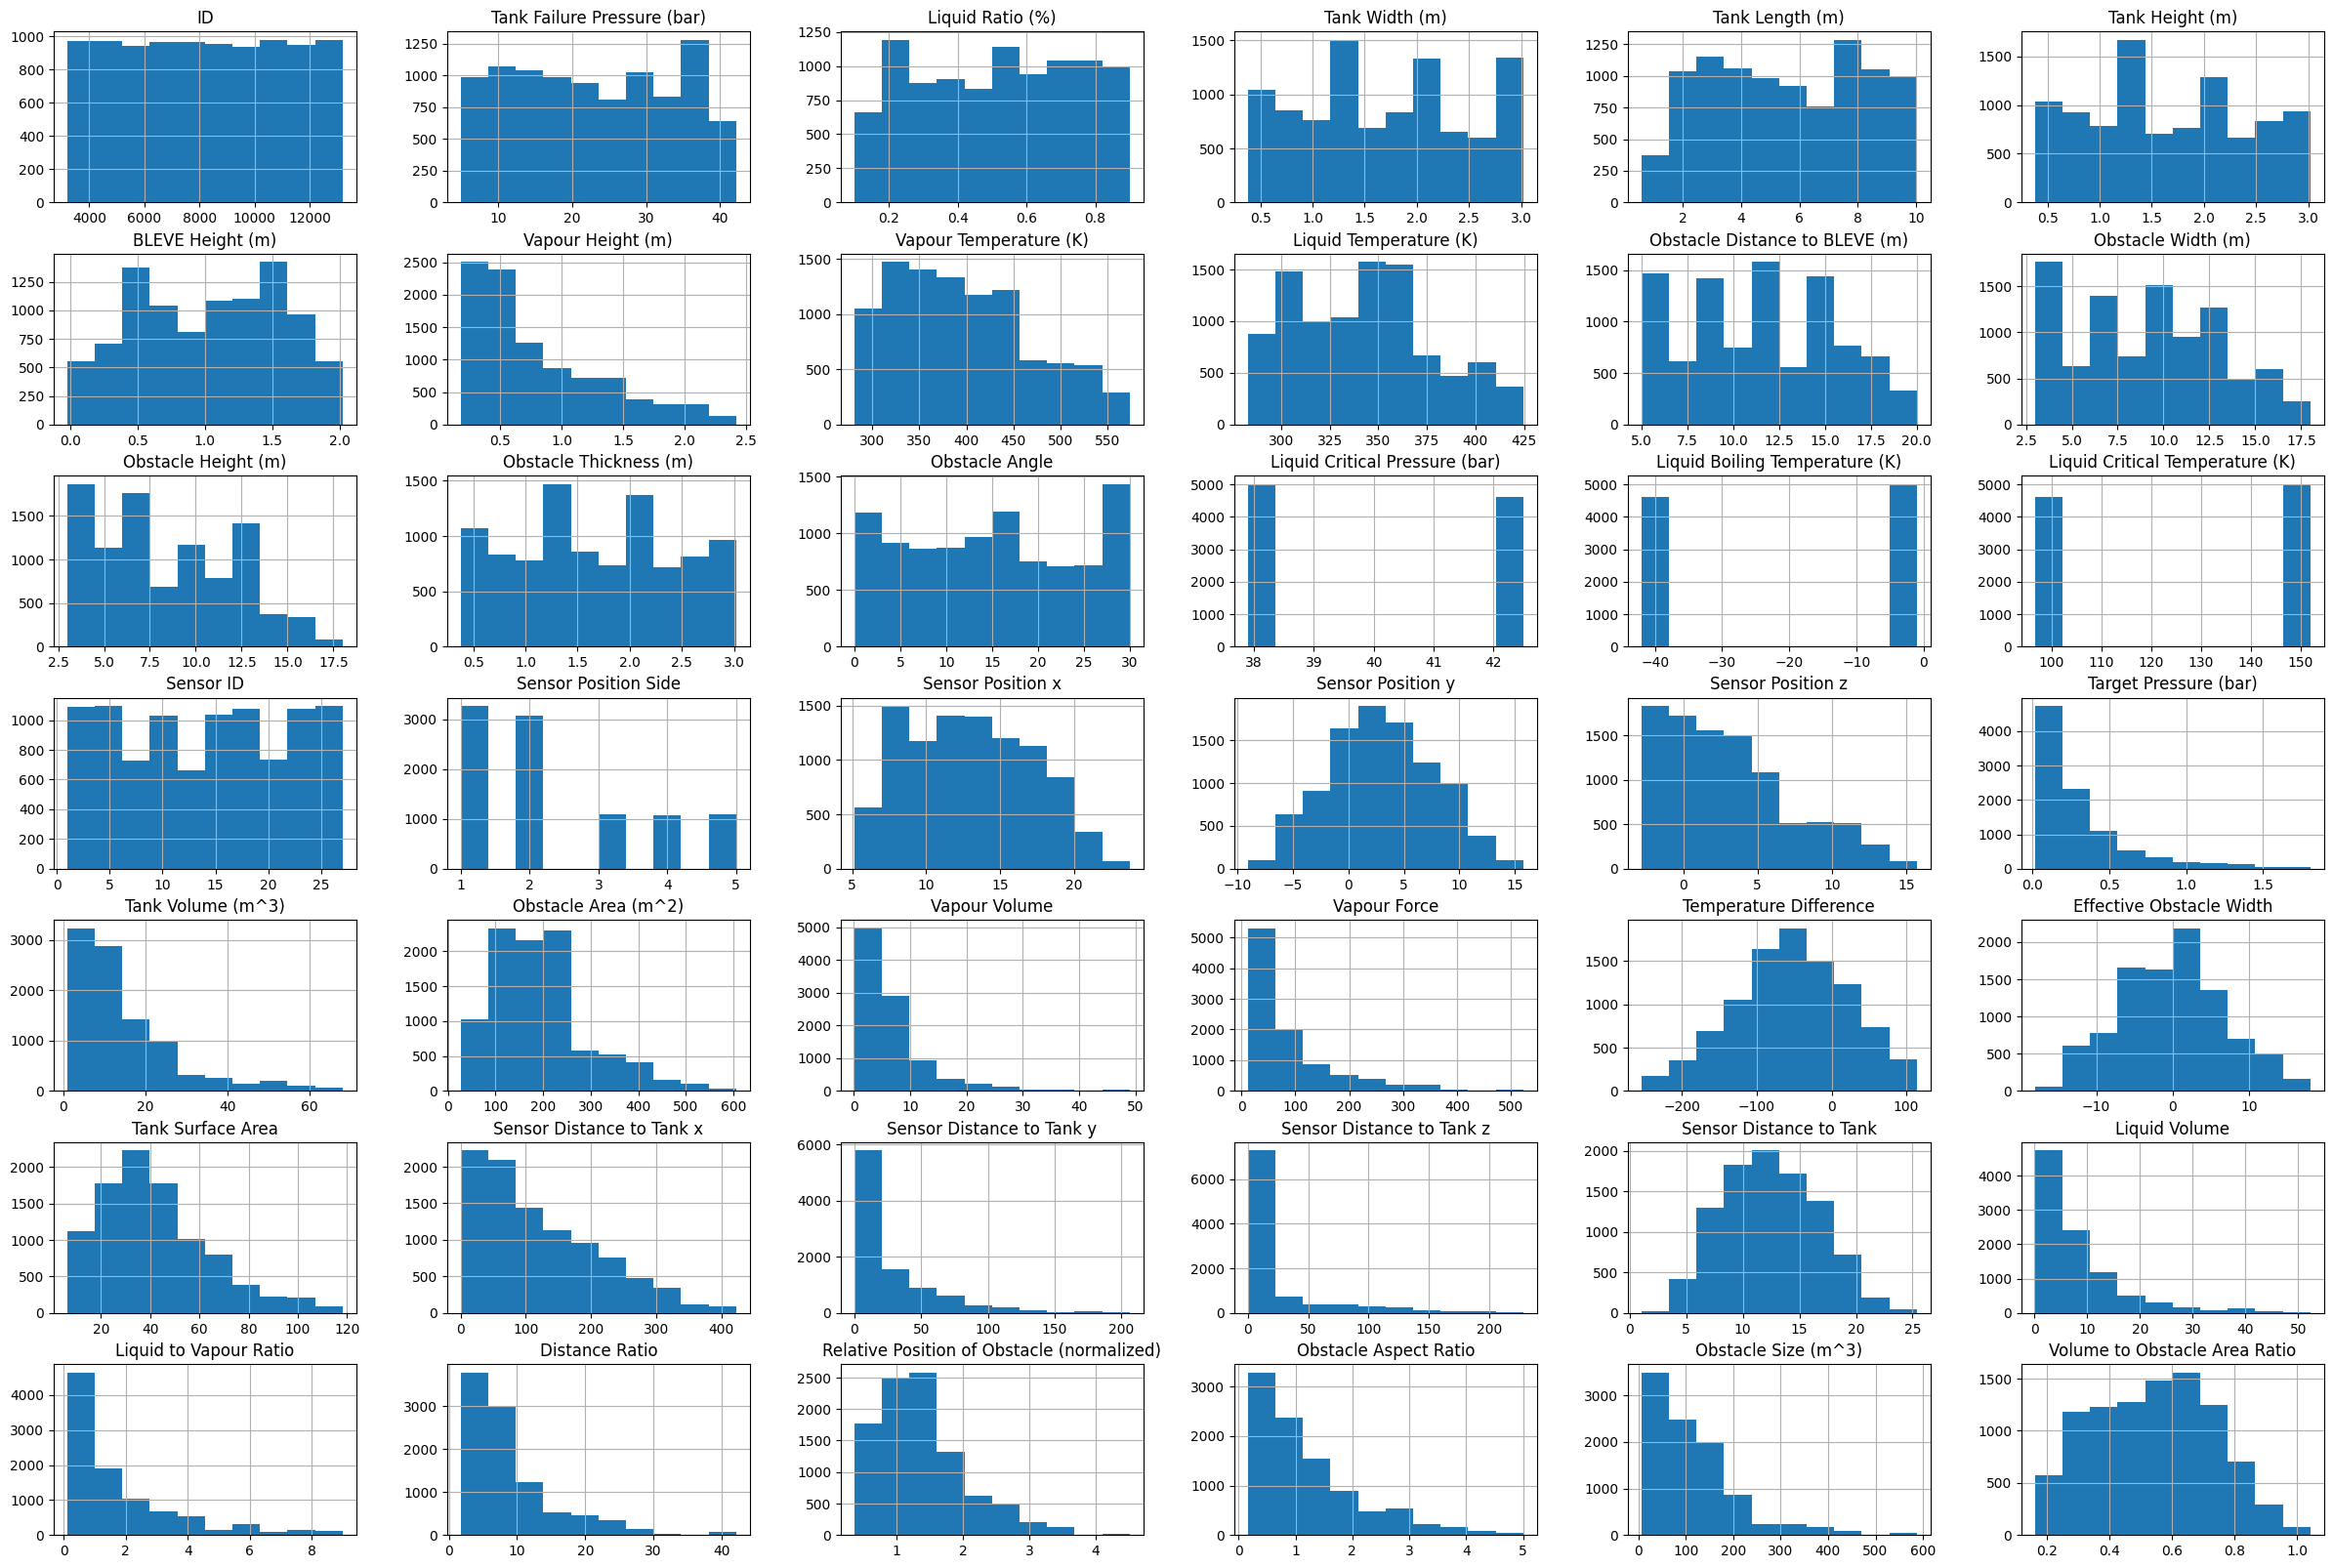

In [300]:
train_data.hist(figsize=(30, 20));

### Data Type Conversion

In [301]:
train_data = train_data.join(pd.get_dummies(train_data.Status)).drop(['Status'], axis=1)
train_data

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Sensor Distance to Tank,Liquid Volume,Liquid to Vapour Ratio,Distance Ratio,Relative Position of Obstacle (normalized),Obstacle Aspect Ratio,Obstacle Size (m^3),Volume to Obstacle Area Ratio,Subcooled,Superheated
0,3203.0,7.32,0.42,2.42,5.39,1.00,1.79,0.60,524.61,354.49,...,15.433507,5.478396,0.724138,11.000000,1.248581,1.181818,88.66,0.280783,False,True
1,3204.0,7.18,0.42,2.39,5.39,1.01,1.81,0.59,522.80,354.31,...,10.913436,5.464587,0.724138,10.891089,1.251422,1.181818,88.66,0.280783,False,True
2,3205.0,7.32,0.41,2.39,5.38,1.00,1.78,0.62,523.00,354.59,...,11.341390,5.271862,0.694915,11.000000,1.254276,1.181818,85.80,0.272554,False,True
3,3206.0,7.26,0.42,2.40,5.41,1.00,1.81,0.61,522.35,354.37,...,14.737860,5.453280,0.724138,11.000000,1.248581,1.181818,85.80,0.272554,False,True
4,3207.0,7.32,0.42,2.40,5.41,1.02,1.79,0.62,522.98,354.33,...,14.872529,5.562346,0.724138,10.784314,1.245753,1.181818,88.66,0.280783,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10044,5815.0,15.27,0.75,0.42,6.79,1.79,0.60,0.60,458.08,377.32,...,2.926286,3.828542,3.000000,3.351955,0.666667,1.666667,27.30,0.461773,False,True
10046,12758.0,16.44,0.55,0.80,5.58,1.99,1.60,0.82,293.54,285.02,...,13.537416,4.885848,1.222222,7.537688,1.792115,0.545455,117.48,0.610222,True,False
10047,9438.0,36.26,0.57,2.38,2.62,2.80,0.60,1.19,349.75,418.53,...,8.231021,9.952018,1.325581,1.785714,0.641026,0.357143,140.70,0.650245,True,False
10048,8689.0,14.27,0.50,2.21,8.40,2.58,1.62,1.40,288.61,396.96,...,16.122566,23.947560,1.000000,6.201550,1.213040,3.000000,57.12,0.426014,False,True


### Feature Selection

In [302]:
from sklearn.feature_selection import SelectKBest, f_regression

skb = SelectKBest(score_func=f_regression, k=36)

X_fs = train_data.drop(['Target Pressure (bar)'], axis = 1)
y_fs = train_data['Target Pressure (bar)']

filtered = skb.fit_transform(X_fs, y_fs)

selected_indices = skb.get_support(indices=True)

for index in selected_indices:
    print(X_fs.columns[index])

Liquid Ratio (%)
Tank Width (m)
Tank Length (m)
Tank Height (m)
BLEVE Height (m)
Vapour Height (m)
Liquid Temperature (K)
Obstacle Distance to BLEVE (m)
Obstacle Width (m)
Obstacle Height (m)
Obstacle Angle
Liquid Critical Pressure (bar)
Liquid Boiling Temperature (K)
Liquid Critical Temperature (K)
Sensor ID
Sensor Position x
Sensor Position y
Sensor Position z
Tank Volume (m^3)
Obstacle Area (m^2)
Vapour Volume
Vapour Force
Temperature Difference
Tank Surface Area
Sensor Distance to Tank x
Sensor Distance to Tank y
Sensor Distance to Tank z
Sensor Distance to Tank
Liquid Volume
Liquid to Vapour Ratio
Distance Ratio
Relative Position of Obstacle (normalized)
Obstacle Size (m^3)
Volume to Obstacle Area Ratio
Subcooled
Superheated


### Feature Scaling

In [303]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = train_data.drop('Target Pressure (bar)', axis=1)
y = train_data['Target Pressure (bar)']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [304]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,9619.0,8200.663686,2894.843949,3203.000000,5705.500000,8187.000000,10710.500000,13202.000000
Tank Failure Pressure (bar),9619.0,22.909795,10.574171,4.920000,13.580000,22.440000,32.050000,42.160000
Liquid Ratio (%),9619.0,0.508848,0.227599,0.100000,0.300000,0.510000,0.710000,0.900000
Tank Width (m),9619.0,1.696751,0.767120,0.380000,1.010000,1.620000,2.390000,3.020000
Tank Length (m),9619.0,5.564035,2.594649,0.580000,3.380000,5.610000,7.810000,10.020000
Tank Height (m),9619.0,1.656170,0.746506,0.380000,1.000000,1.600000,2.380000,3.020000
BLEVE Height (m),9619.0,1.028021,0.574306,-0.020000,0.590000,1.020000,1.580000,2.020000
Vapour Height (m),9619.0,0.824667,0.516936,0.180000,0.400000,0.620000,1.190000,2.420000
Vapour Temperature (K),9619.0,396.765207,71.596552,281.210000,336.890000,386.880000,441.900000,573.300000
Liquid Temperature (K),9619.0,343.012571,35.362991,282.950000,312.530000,342.150000,365.090000,424.600000


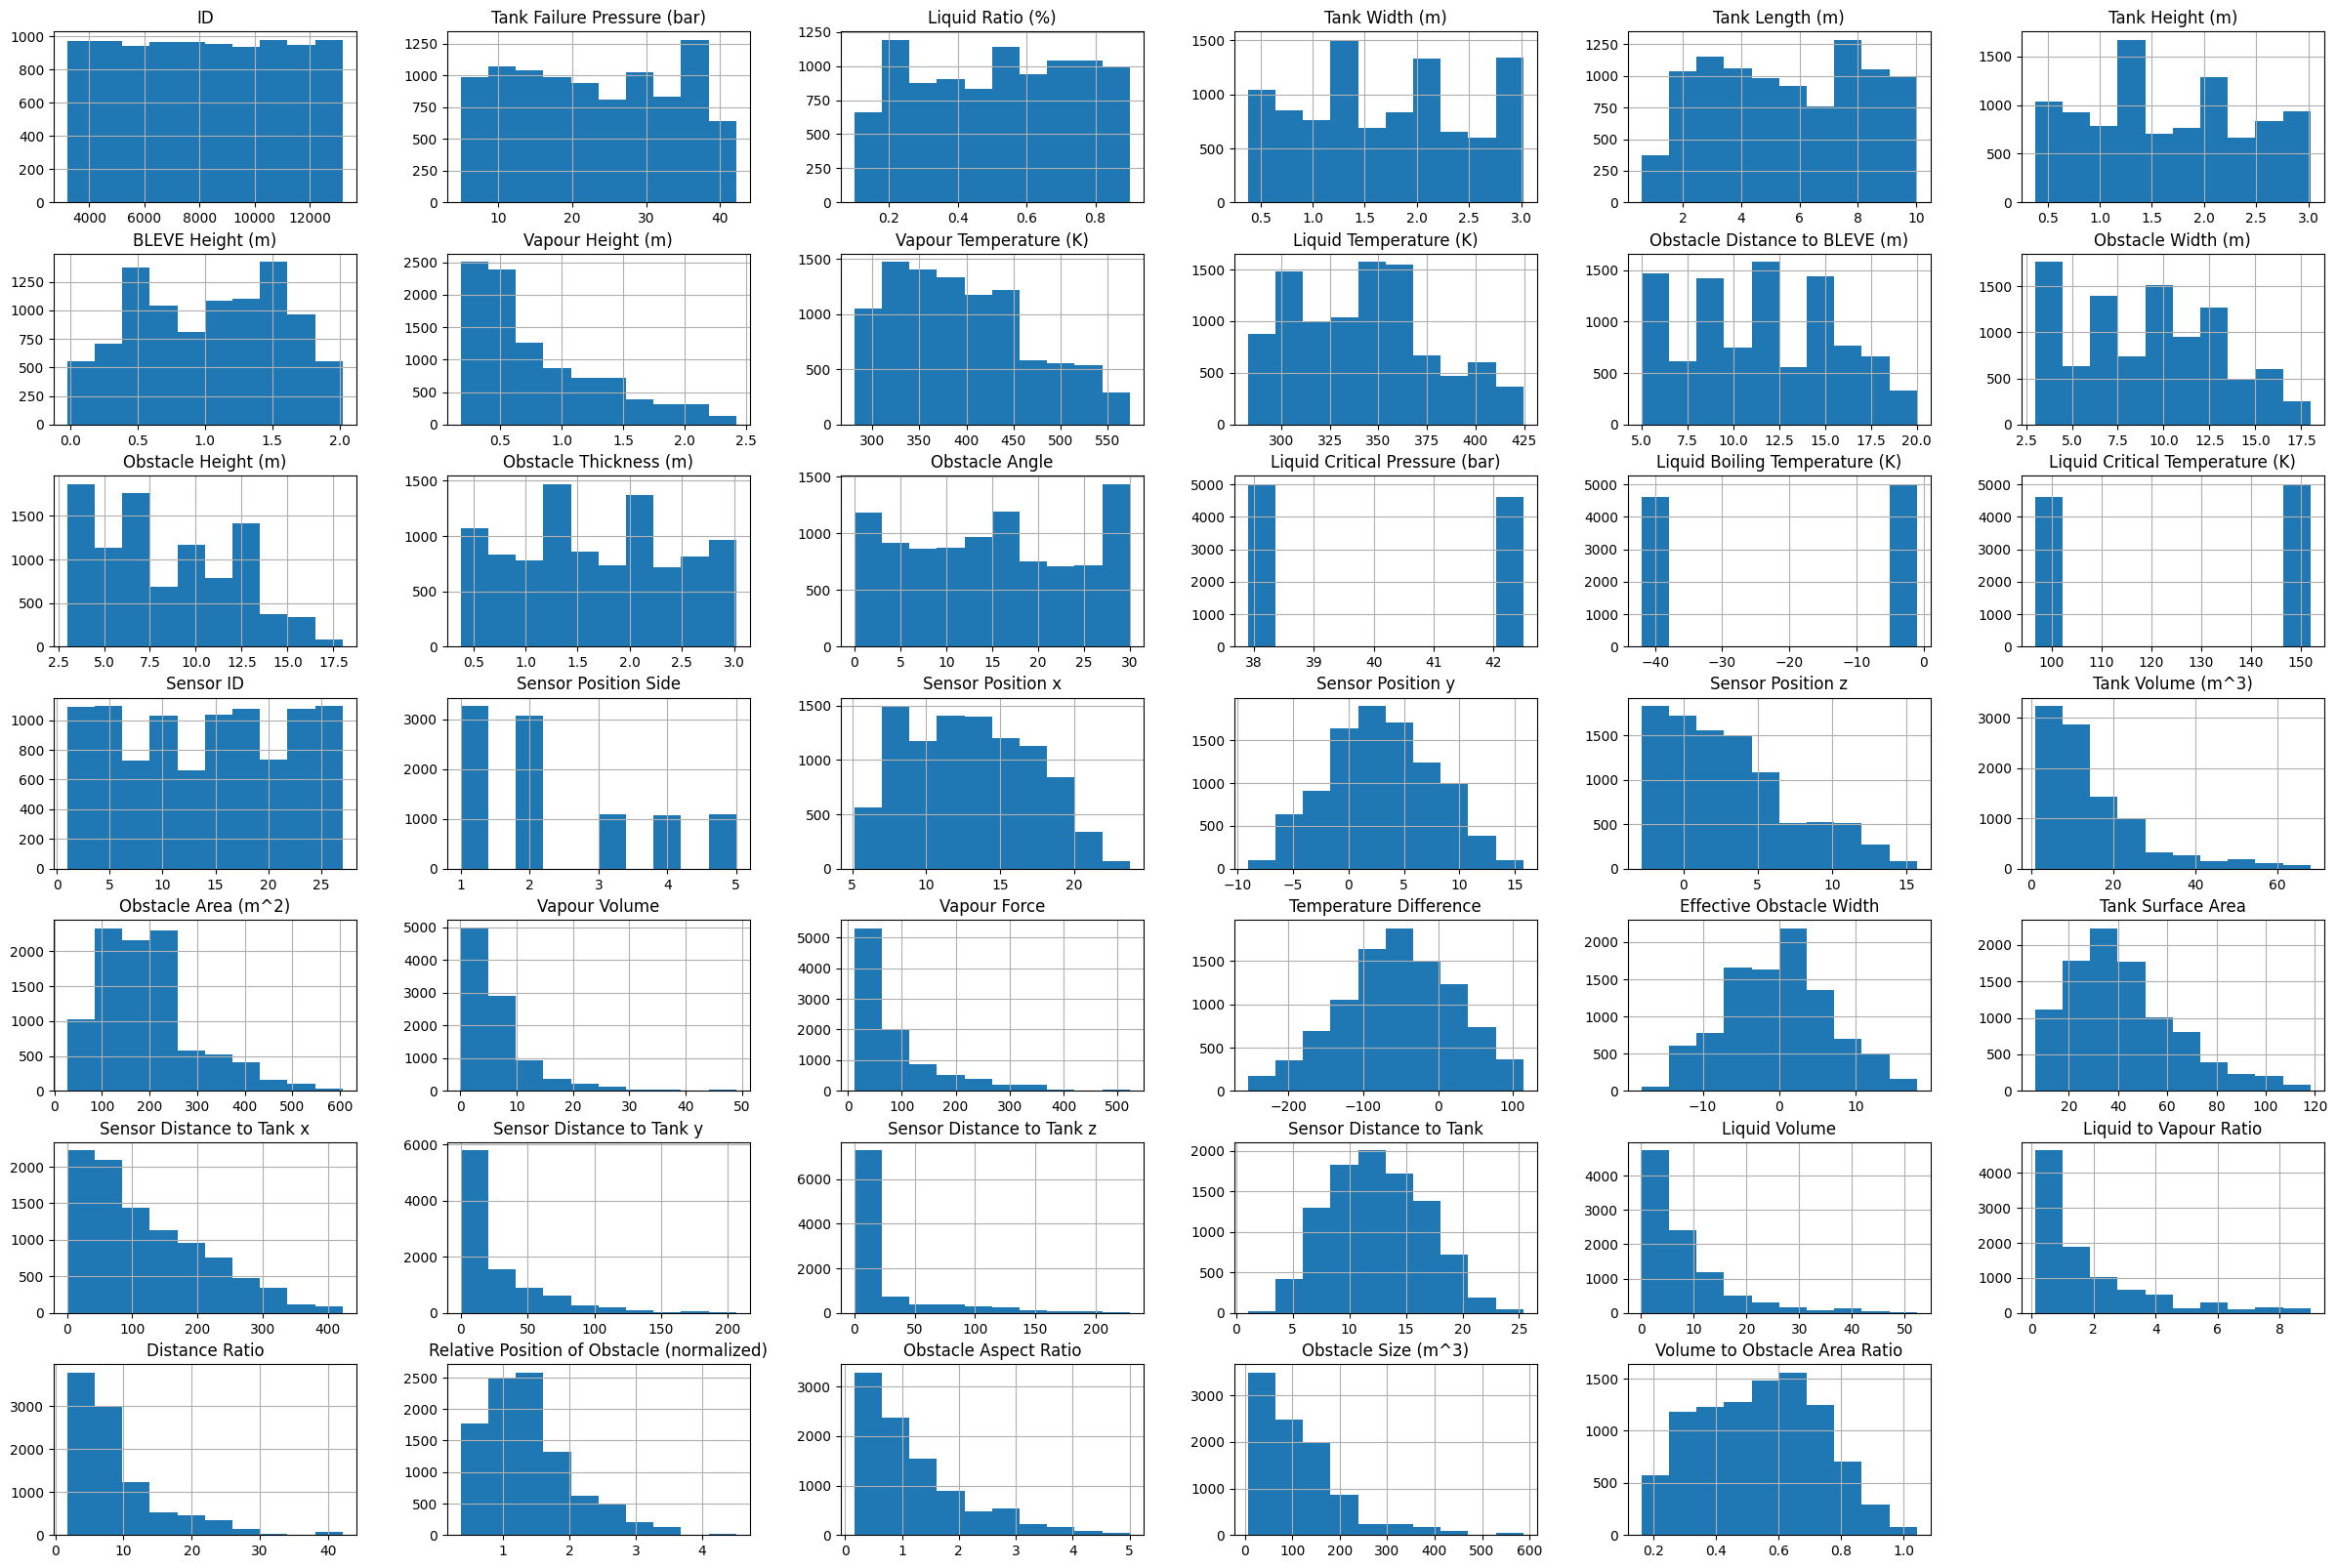

In [305]:
X.hist(figsize=(30, 20));

## Model Development

In [306]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

#### Linear Regression

##### Basic Model

In [310]:
linear = LinearRegression()

linear.fit(X_train, y_train)

y_preds = linear.predict(X_test)

r2 = r2_score(y_test, y_preds)
mape = mean_absolute_percentage_error(y_test, y_preds)

print("R2: ", r2)
print("MAPE: ", mape)

R2:  0.6029606195926154
MAPE:  0.8268066080248316


##### Hyperparameter Tuning

In [77]:
linear = LinearRegression()

params = {
    'fit_intercept': [True, False]
}

linear_search = GridSearchCV(
    estimator= linear,
    param_grid=params,
    cv=5,
    scoring='neg_mean_absolute_error')

linear_search.fit(X_train, y_train)

best_params = linear_search.best_params_
print("Best Hyperparameters:", best_params)

# Ideal Linear Model
ideal_linear = linear_search.best_estimator_
y_pred = ideal_linear.predict(X_test)

r2 = r2_score(y_test, y_preds)
mape = mean_absolute_percentage_error(y_test, y_preds)

print("R2: ", r2)
print("MAPE: ", mape)

Best Hyperparameters: {'fit_intercept': True}
R2:  0.6162139414993587
MAPE:  0.7772732287600995


#### XGBoost Regression

##### Basic Model

In [269]:
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

y_preds = xgb.predict(X_test)

r2 = r2_score(y_test, y_preds)
mape = mean_absolute_percentage_error(y_test, y_preds)

print("R2: ", r2)
print("MAPE: ", mape)

R2:  0.9516586293416162
MAPE:  0.16302332775403736


##### Hyperparameter Tuning

In [328]:
params = {
    'n_estimators': [200, 500, 1000, 1500],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.1, 0.5, 1],
    'subsample': [0.6, 0.8, 1.0],
    'min_child_weight': [5],
    'colsample_bytree': [0.9],
    'gamma': [0]
}

xgb = XGBRegressor()

xgb_search = GridSearchCV(
    estimator=xgb,
    param_grid=params,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    n_jobs=-1)

xgb_search.fit(X_train, y_train)

best_params = xgb_search.best_params_
print("Best Hyperparameters:", best_params)

ideal_xgb = xgb_search.best_estimator_
y_preds = ideal_xgb.predict(X_test)

r2 = r2_score(y_test, y_preds)
mape = mean_absolute_percentage_error(y_test, y_preds)

print("R2: ", r2)
print("MAPE: ", mape)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Hyperparameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 1500, 'subsample': 0.9}
R2:  0.941846872399352
MAPE:  0.12634241973455762


In [270]:
xgb_ideal = XGBRegressor(
    n_estimators = 1000,
    max_depth = 10,
    learning_rate = 0.1,
    subsample=0.9,
    min_child_weight = 5,
    colsample_bytree = 0.9,
    gamma = 0,)

xgb_ideal.fit(X_train, y_train)

y_preds = xgb_ideal.predict(X_test)

r2 = r2_score(y_test, y_preds)
mape = mean_absolute_percentage_error(y_test, y_preds)

print("R2: ", r2)
print("MAPE: ", mape)

R2:  0.960683874996907
MAPE:  0.11769886388150644


#### MLP Regression

##### Basic Model

In [406]:
mlp = MLPRegressor()

mlp.fit(X_train, y_train)

y_preds = mlp.predict(X_test)

r2 = r2_score(y_test, y_preds)
mape = mean_absolute_percentage_error(y_test, y_preds)

print("R2: ", r2)
print("MAPE: ", mape)

R2:  -0.15668381729707193
MAPE:  1.7713021054667715


##### Hyperparameter Tuning

In [120]:
params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

mlp = MLPRegressor()

mlp_search = GridSearchCV(
    estimator=mlp,
    param_grid=params,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    n_jobs=-1)

mlp_search.fit(X_train, y_train)

best_params = mlp_search.best_params_
print("Best Hyperparameters:", best_params)

# Ideal MLP Model
ideal_mlp = mlp_search.best_estimator_
y_preds = ideal_mlp.predict(X_test)

r2 = r2_score(y_test, y_preds)
mape = mean_absolute_percentage_error(y_test, y_preds)

print("R2: ", r2)
print("MAPE: ", mape)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive'}
R2:  0.950773950655859
MAPE:  0.2434838391231757


#### CatBoost Regression

In [ ]:
!pip install catboost

##### Basic Model

In [407]:
from catboost import CatBoostRegressor

model_catboost = CatBoostRegressor()
model_catboost.fit(X_train, y_train)

y_preds = model_catboost.predict(X_test)

r2 = r2_score(y_test, y_preds)
mape = mean_absolute_percentage_error(y_test, y_preds)

print("R2: ", r2)
print("MAPE: ", mape)

Learning rate set to 0.05652
0:	learn: 0.3003236	total: 10.6ms	remaining: 10.6s
1:	learn: 0.2894084	total: 19.1ms	remaining: 9.51s
2:	learn: 0.2788541	total: 27.2ms	remaining: 9.05s
3:	learn: 0.2685568	total: 35.5ms	remaining: 8.83s
4:	learn: 0.2589096	total: 43.5ms	remaining: 8.65s
5:	learn: 0.2495326	total: 51.7ms	remaining: 8.56s
6:	learn: 0.2410701	total: 60.3ms	remaining: 8.55s
7:	learn: 0.2329925	total: 68.2ms	remaining: 8.45s
8:	learn: 0.2258712	total: 76.1ms	remaining: 8.38s
9:	learn: 0.2189163	total: 84.7ms	remaining: 8.38s
10:	learn: 0.2119713	total: 92.9ms	remaining: 8.35s
11:	learn: 0.2057398	total: 101ms	remaining: 8.34s
12:	learn: 0.2002056	total: 110ms	remaining: 8.31s
13:	learn: 0.1944581	total: 118ms	remaining: 8.29s
14:	learn: 0.1892631	total: 126ms	remaining: 8.26s
15:	learn: 0.1844673	total: 134ms	remaining: 8.27s
16:	learn: 0.1801957	total: 145ms	remaining: 8.4s
17:	learn: 0.1757601	total: 153ms	remaining: 8.37s
18:	learn: 0.1715515	total: 165ms	remaining: 8.51s
19

##### Hyperparameter Tuning

In [276]:
model = CatBoostRegressor()
parameters = {'depth' : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations'    : [30, 50, 100]
              }

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


0:	learn: 0.2879487	total: 33.7ms	remaining: 3.34s
1:	learn: 0.2691333	total: 54.8ms	remaining: 2.69s
2:	learn: 0.2514064	total: 76.1ms	remaining: 2.46s
3:	learn: 0.2360126	total: 98.1ms	remaining: 2.35s
4:	learn: 0.2227160	total: 121ms	remaining: 2.29s
5:	learn: 0.2087131	total: 144ms	remaining: 2.25s
6:	learn: 0.1972582	total: 166ms	remaining: 2.2s
7:	learn: 0.1862027	total: 188ms	remaining: 2.16s
8:	learn: 0.1769282	total: 210ms	remaining: 2.12s
9:	learn: 0.1682765	total: 234ms	remaining: 2.1s
10:	learn: 0.1609818	total: 262ms	remaining: 2.12s
11:	learn: 0.1540166	total: 296ms	remaining: 2.17s
12:	learn: 0.1475855	total: 318ms	remaining: 2.13s
13:	learn: 0.1418352	total: 340ms	remaining: 2.09s
14:	learn: 0.1367859	total: 362ms	remaining: 2.05s
15:	learn: 0.1323558	total: 385ms	remaining: 2.02s
16:	learn: 0.1281794	total: 407ms	remaining: 1.99s
17:	learn: 0.1242578	total: 431ms	remaining: 1.96s
18:	learn: 0.1211828	total: 456ms	remaining: 1.95s
19:	learn: 0.1181770	total: 479ms	remai

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x7ba6c7b70d00>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.05, 0.1]})

In [282]:
grid.best_params_

{'depth': 8, 'iterations': 100, 'learning_rate': 0.1}

In [408]:
catboost_ideal = CatBoostRegressor(depth=8, iterations=1500, learning_rate=0.1)
catboost_ideal.fit(X_train, y_train)

y_preds = catboost_ideal.predict(X_test)

r2 = r2_score(y_test, y_preds)
mape = mean_absolute_percentage_error(y_test, y_preds)

print("R2: ", r2)
print("MAPE: ", mape)

0:	learn: 0.2898716	total: 37.8ms	remaining: 56.6s
1:	learn: 0.2699033	total: 61.2ms	remaining: 45.8s
2:	learn: 0.2526062	total: 83.1ms	remaining: 41.5s
3:	learn: 0.2368873	total: 106ms	remaining: 39.5s
4:	learn: 0.2224492	total: 128ms	remaining: 38.4s
5:	learn: 0.2103554	total: 151ms	remaining: 37.5s
6:	learn: 0.1983420	total: 174ms	remaining: 37.2s
7:	learn: 0.1878931	total: 197ms	remaining: 36.8s
8:	learn: 0.1783128	total: 222ms	remaining: 36.7s
9:	learn: 0.1698940	total: 249ms	remaining: 37s
10:	learn: 0.1626085	total: 274ms	remaining: 37s
11:	learn: 0.1556491	total: 297ms	remaining: 36.9s
12:	learn: 0.1488029	total: 322ms	remaining: 36.9s
13:	learn: 0.1429231	total: 345ms	remaining: 36.6s
14:	learn: 0.1378138	total: 368ms	remaining: 36.4s
15:	learn: 0.1331700	total: 392ms	remaining: 36.3s
16:	learn: 0.1287769	total: 420ms	remaining: 36.7s
17:	learn: 0.1253208	total: 468ms	remaining: 38.5s
18:	learn: 0.1216118	total: 501ms	remaining: 39.1s
19:	learn: 0.1185782	total: 535ms	remainin

#### Tensorflow Neural Networks (Sequential Model)

In [194]:
from __future__ import print_function

from tensorflow.python import keras
from keras.layers import Dense, Activation
from keras.models import Sequential, Model

X_temp = np.asarray(X).astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size=0.2)

model = Sequential()
model.add(Dense(21, activation='relu'))
model.add(Dense(21, activation='relu'))
model.add(Dense(21, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_percentage_error')

model.fit(
    x=X_train,
    y=y_train,
    batch_size=128,
    epochs=100)

y_preds = model.predict(X_test)

r2 = r2_score(y_test, y_preds)
mape = mean_absolute_percentage_error(y_test, y_preds)

print("R2: ", r2)
print("MAPE: ", mape)

Epoch 1/100
61/61 [==============================] - 4s 7ms/step - loss: 20728.5527
Epoch 2/100
61/61 [==============================] - 0s 8ms/step - loss: 2728.9617
Epoch 3/100
61/61 [==============================] - 1s 9ms/step - loss: 2093.1865
Epoch 4/100
61/61 [==============================] - 1s 9ms/step - loss: 3168.5085
Epoch 5/100
61/61 [==============================] - 0s 8ms/step - loss: 2998.0046
Epoch 6/100
61/61 [==============================] - 0s 8ms/step - loss: 2632.4792
Epoch 7/100
61/61 [==============================] - 0s 8ms/step - loss: 2615.7659
Epoch 8/100
61/61 [==============================] - 1s 9ms/step - loss: 3974.3425
Epoch 9/100
61/61 [==============================] - 1s 8ms/step - loss: 3003.1165
Epoch 10/100
61/61 [==============================] - 1s 9ms/step - loss: 5014.8965
Epoch 11/100
61/61 [==============================] - 1s 9ms/step - loss: 2139.4285
Epoch 12/100
61/61 [==============================] - 0s 8ms/step - loss: 1618.5371


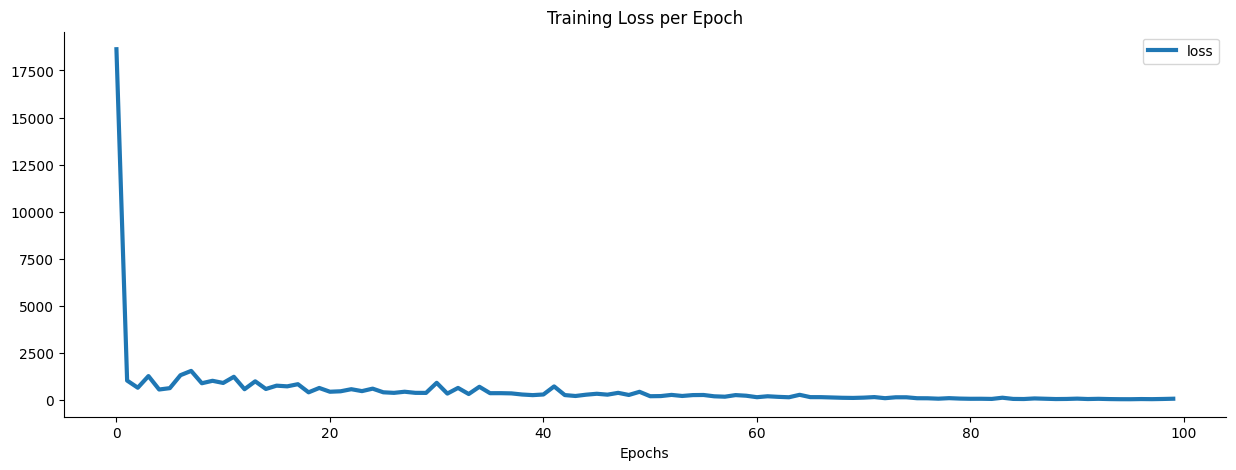

In [316]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

#### Ensemble Model

In [314]:
## ensemble model (XDBoost and CatBoost) //Overfitting :(

y_pred_xgb = xgb_ideal.predict(X_test)
y_pred_cat = model_catboost.predict(X_test)

rmse_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
rmse_cat = mean_absolute_percentage_error(y_test, y_pred_cat)

weight_xgb = 1 / rmse_xgb
weight_cat = 1 / rmse_cat

total_weight = weight_xgb + weight_cat
weight_xgb /= total_weight
weight_cat /= total_weight

y_pred_ensemble = (weight_xgb * y_pred_xgb + weight_cat * y_pred_cat)

ensemble_rmse = mean_absolute_percentage_error(y_test, y_pred_ensemble)

ensemble_rmse

0.10557710577625744

## Export Predictions

In [300]:
# Load test dataset
test_data = pd.read_csv("test.csv", low_memory=False)
test_data.head()

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z
0,0,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,1,Superheated,37.9,-1,152.0,1,1,12.05,-5.6,-1.0
1,1,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,1,Superheated,37.9,-1,152.0,2,1,12.05,-5.6,1.3
2,2,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,1,Superheated,37.9,-1,152.0,3,1,12.05,-5.6,3.6
3,3,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,1,Superheated,37.9,-1,152.0,4,1,12.05,0.2,-1.0
4,4,16.8,0.336426,2.8,8.6,2.2,0.4,1.6,389.9,387.2,...,1,Superheated,37.9,-1,152.0,5,1,12.05,0.2,1.3


In [301]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3203 non-null   int64  
 1   Tank Failure Pressure (bar)      3203 non-null   float64
 2   Liquid Ratio (%)                 3203 non-null   float64
 3   Tank Width (m)                   3203 non-null   float64
 4   Tank Length (m)                  3203 non-null   float64
 5   Tank Height (m)                  3203 non-null   float64
 6   BLEVE Height (m)                 3203 non-null   float64
 7   Vapour Height (m)                3203 non-null   float64
 8   Vapour Temperature (K)           3203 non-null   float64
 9   Liquid Temperature (K)           3203 non-null   float64
 10  Obstacle Distance to BLEVE (m)   3203 non-null   int64  
 11  Obstacle Width (m)               3203 non-null   int64  
 12  Obstacle Height (m) 

In [303]:
def data_preprocess(data):

  id_column = data['ID']

  #Feature Engineering
  data['Tank Volume (m^3)'] = data['Tank Width (m)'] * data['Tank Length (m)'] * data['Tank Height (m)']
  data['Obstacle Area (m^2)'] = data['Obstacle Width (m)'] * data['Obstacle Height (m)']
  data['Vapour Volume'] = (1 - data['Liquid Ratio (%)']) * data['Tank Volume (m^3)']
  data['Vapour Force']  = data['Tank Failure Pressure (bar)'] * (data['Tank Length (m)'] * data['Vapour Height (m)'])
  data['Temperature Difference'] = data['Liquid Temperature (K)'] - data['Vapour Temperature (K)']
  data['Effective Obstacle Width']  = data['Obstacle Width (m)'] * np.cos(data['Obstacle Angle'])
  data['Tank Surface Area']  = 2 * (data['Tank Length (m)'] * data['Tank Width (m)'] + data['Tank Length (m)'] * data['Tank Height (m)'] + data['Tank Width (m)'] * data['Tank Height (m)'])

  data['Sensor Distance to Tank x'] = (data['Sensor Position x'] - data['Tank Length (m)']/2) ** 2
  data['Sensor Distance to Tank y'] = (data['Sensor Position y'] - data['Tank Width (m)']/2) ** 2
  data['Sensor Distance to Tank z'] = (data['Sensor Position z'] - data['Tank Height (m)']/2) ** 2

  data['Sensor Distance to Tank'] = np.sqrt(data['Sensor Distance to Tank x'] + data['Sensor Distance to Tank y'] + data['Sensor Distance to Tank z'])

  data['Liquid Volume'] = data['Tank Volume (m^3)'] - data['Vapour Volume']
  data['Liquid to Vapour Ratio'] = data['Liquid Volume'] / data['Vapour Volume']
  data['Distance Ratio'] = data['Obstacle Distance to BLEVE (m)'] / data['Tank Height (m)']

  data['Relative Position of Obstacle (normalized)'] = data['Obstacle Distance to BLEVE (m)'] / ( data['Tank Width (m)'] + data['Tank Length (m)'] + data['Tank Height (m)'])
  data['Obstacle Aspect Ratio'] = data['Obstacle Height (m)'] / data['Obstacle Width (m)']
  data['Obstacle Size (m^3)'] = data['Obstacle Width (m)'] * data['Obstacle Height (m)'] * data['Obstacle Thickness (m)']
  data['Volume to Obstacle Area Ratio'] = data['Obstacle Size (m^3)'] / data['Obstacle Area (m^2)']

  data['Tank Volume (m^3)'] = np.log(data['Tank Volume (m^3)'] + 1)
  data['Obstacle Area (m^2)'] = np.log(data['Obstacle Area (m^2)'] + 1)
  data['Vapour Volume'] = np.log(data['Vapour Volume'] + 1)
  data['Vapour Force'] = np.log(data['Vapour Force'] + 1)
  data['Liquid Volume'] = np.log(data['Liquid Volume'] + 1)
  data['Liquid to Vapour Ratio'] = np.log(data['Liquid to Vapour Ratio'] + 1)
  data['Distance Ratio'] = np.log(data['Distance Ratio'] + 1)
  data['Relative Position of Obstacle (normalized)'] = np.log(data['Relative Position of Obstacle (normalized)'] + 1)
  data['Obstacle Aspect Ratio'] = np.log(data['Obstacle Aspect Ratio'] + 1)
  data['Obstacle Size (m^3)'] = np.log(data['Obstacle Size (m^3)'] + 1)

  # Data type conversion
  data = data.join(pd.get_dummies(data.Status)).drop(['Status'], axis=1)

  # Feature scaling
  scaler = StandardScaler()
  data = scaler.fit_transform(data)

  return id_column, data

In [310]:
# Predict and export test data
def predict_and_export(model):

  test_data = pd.read_csv("test.csv", low_memory=False)

  id_column, test_data = data_preprocess(test_data)

  # Predict
  test_preds = model.predict(test_data)

  # Export predictions
  df_preds = pd.DataFrame()
  df_preds["ID"] = id_column
  df_preds["Target Pressure (bar)"] = test_preds

  import datetime
  file_name = "test_predictions_" + datetime.datetime.now().strftime("%d-%m-%Y_%H:%M:%S") + ".csv"

  df_preds.to_csv("./" + file_name, index=False)
  print('file: ', file_name)

In [312]:
predict_and_export(model_catboost)

file:  test_predictions_05-05-2024_13:00:52.csv


In [308]:
def ensemble_predict_and_score(model_1, model_2, weight_1, weight_2):

  test_data = pd.read_csv("test.csv", low_memory=False)

  id_column, test_data = data_preprocess(test_data)

  # Predict
  y_pred_model_1 = model_1.predict(test_data)
  y_pred_model_2 = model_2.predict(test_data)

  y_pred_ensemble = (weight_1 * y_pred_model_1 + weight_2 * y_pred_model_2)

  # Export predictions
  df_preds = pd.DataFrame()
  df_preds["ID"] = id_column
  df_preds["Target Pressure (bar)"] = y_pred_ensemble

  import datetime
  file_name = "test_predictions_" + datetime.datetime.now().strftime("%d-%m-%Y_%H:%M:%S") + ".csv"

  df_preds.to_csv("./" + file_name, index=False)
  print('file: ', file_name)

In [309]:
ensemble_predict_and_score(xgb_ideal, model_catboost, 0.4932404258090708, 0.5067595741909292)

file:  test_predictions_05-05-2024_12:57:53.csv


In [234]:
y_preds = xgb_ideal.predict(X_test)
mean_absolute_percentage_error(y_test, y_preds)

0.10812796322332364